In [5]:
import os

def list_files(directory):
    file_paths = []
    for dirname, _, filenames in os.walk(directory):
        for filename in filenames:
            file_paths.append(os.path.join(dirname, filename))
    return file_paths

directory_path = '/kaggle/input'
files = list_files(directory_path)
for file in files:
    print(file)



In [6]:
# Base Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Analysis Libraries
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler,StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report,confusion_matrix,mean_squared_error,accuracy_score,recall_score,precision_score,f1_score,roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, RandomizedSearchCV
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE
import scipy.stats as stats
from scipy.stats import shapiro, levene, kruskal, ttest_ind, f_oneway
from tabulate import tabulate

# Machine Learning Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

#Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

import warnings
warnings.filterwarnings("ignore")

In [7]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 55)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [8]:
df = pd.read_csv(r"C:\Users\tetik\Downloads\archive (2)\parkinsons_disease_data.csv")


In [9]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis,DoctorInCharge
0,3058,85,0,3,1,19.620,0,5.108,1.381,3.894,9.283,0,0,0,0,0,0,129,60,222.842,148.126,37.868,337.307,6.459,29.181,1.572,1,0,0,0,0,0,0,0,DrXXXConfid
1,3059,75,0,0,2,16.247,1,6.028,8.410,8.513,5.602,0,0,0,0,0,0,163,76,210.501,153.756,77.228,264.636,37.307,12.333,4.788,0,1,0,1,0,1,0,1,DrXXXConfid
2,3060,70,1,0,0,15.368,0,2.242,0.213,6.499,9.930,0,0,0,1,0,0,113,93,287.388,118.703,85.588,395.663,67.838,29.928,2.131,1,0,0,0,1,0,1,1,DrXXXConfid
3,3061,52,0,0,0,15.455,0,5.998,1.375,6.715,4.196,0,0,0,0,0,0,146,78,280.340,136.299,51.870,362.190,52.965,21.304,3.391,1,1,1,0,0,0,1,1,DrXXXConfid
4,3062,87,0,0,1,18.616,0,9.775,1.189,4.658,9.364,0,0,0,0,0,0,115,94,284.014,108.449,25.069,149.957,21.805,8.336,3.201,0,0,0,1,0,1,0,0,DrXXXConfid


In [10]:
# Dataframe summary

def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

    display(summ)

summary(df)

data shape: (2105, 35)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
PatientID,int64,0,0.000,0,2105,2105,3058.000,5162.000,4110.000,607.805,3058,3059,3060
Age,int64,0,0.000,0,40,2105,50.000,89.000,69.602,11.595,85,75,70
Gender,int64,0,0.000,0,2,2105,0.000,1.000,0.493,0.500,0,0,1
Ethnicity,int64,0,0.000,0,4,2105,0.000,3.000,0.693,1.004,3,0,0
EducationLevel,int64,0,0.000,0,4,2105,0.000,3.000,1.337,0.896,1,2,0
BMI,float64,0,0.000,0,2105,2105,15.008,40.000,27.209,7.208,19.620,16.247,15.368
Smoking,int64,0,0.000,0,2,2105,0.000,1.000,0.296,0.457,0,1,0
AlcoholConsumption,float64,0,0.000,0,2105,2105,0.002,19.989,10.040,5.687,5.108,6.028,2.242
PhysicalActivity,float64,0,0.000,0,2105,2105,0.004,9.995,5.017,2.891,1.381,8.410,0.213
DietQuality,float64,0,0.000,0,2105,2105,0.000,9.996,4.913,2.872,3.894,8.513,6.499


In [11]:
df = df.drop("DoctorInCharge", axis = 1)

In [12]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 2105
Variables: 34
cat_cols: 18
num_cols: 16
cat_but_car: 0
num_but_cat: 18


In [13]:
cat_cols, num_cols, cat_but_car

(['Gender',
  'Ethnicity',
  'EducationLevel',
  'Smoking',
  'FamilyHistoryParkinsons',
  'TraumaticBrainInjury',
  'Hypertension',
  'Diabetes',
  'Depression',
  'Stroke',
  'Tremor',
  'Rigidity',
  'Bradykinesia',
  'PosturalInstability',
  'SpeechProblems',
  'SleepDisorders',
  'Constipation',
  'Diagnosis'],
 ['PatientID',
  'Age',
  'BMI',
  'AlcoholConsumption',
  'PhysicalActivity',
  'DietQuality',
  'SleepQuality',
  'SystolicBP',
  'DiastolicBP',
  'CholesterolTotal',
  'CholesterolLDL',
  'CholesterolHDL',
  'CholesterolTriglycerides',
  'UPDRS',
  'MoCA',
  'FunctionalAssessment'],
 [])

   Gender  Ratio
0    1068 50.736
1    1037 49.264


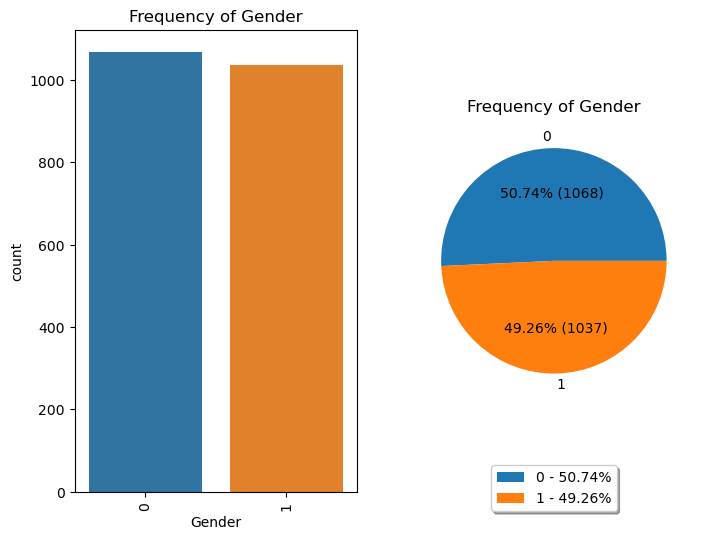

   Ethnicity  Ratio
0       1270 60.333
1        425 20.190
3        213 10.119
2        197  9.359


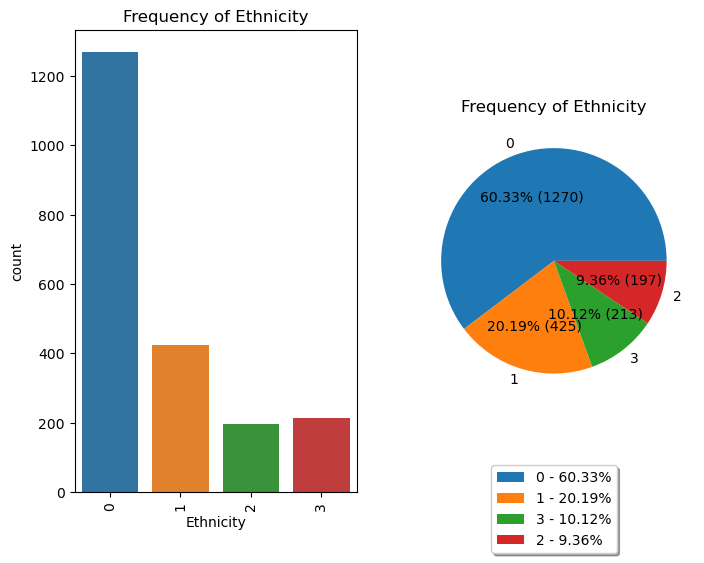

   EducationLevel  Ratio
1             840 39.905
2             656 31.164
0             388 18.432
3             221 10.499


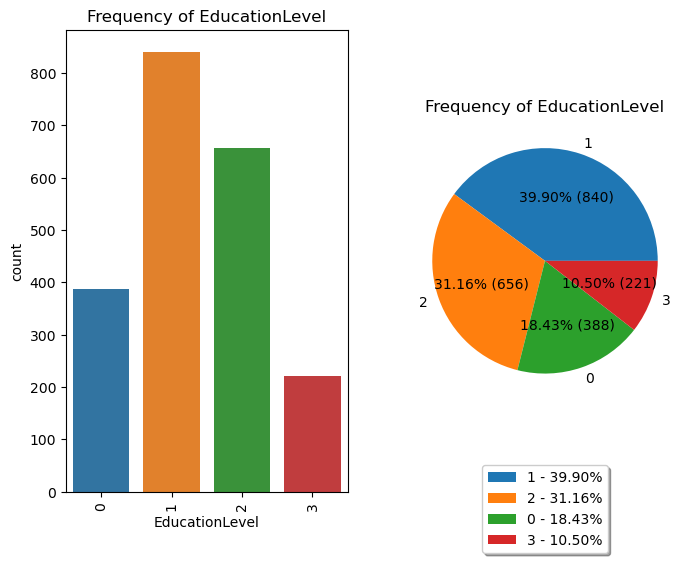

   Smoking  Ratio
0     1481 70.356
1      624 29.644


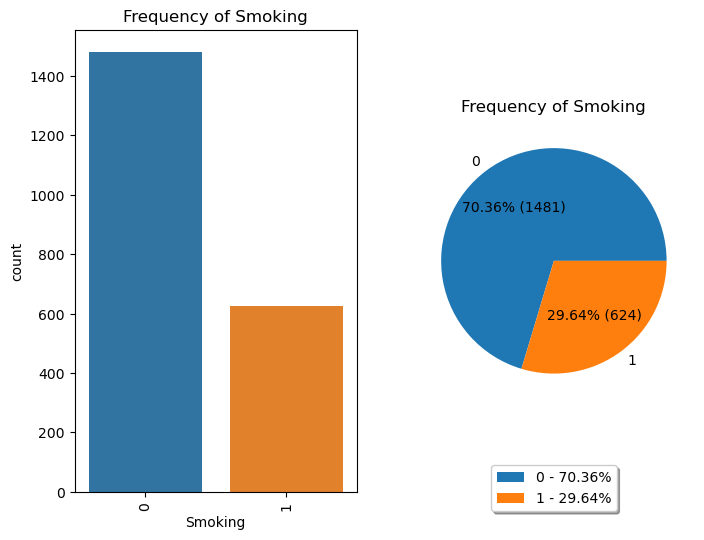

   FamilyHistoryParkinsons  Ratio
0                     1798 85.416
1                      307 14.584


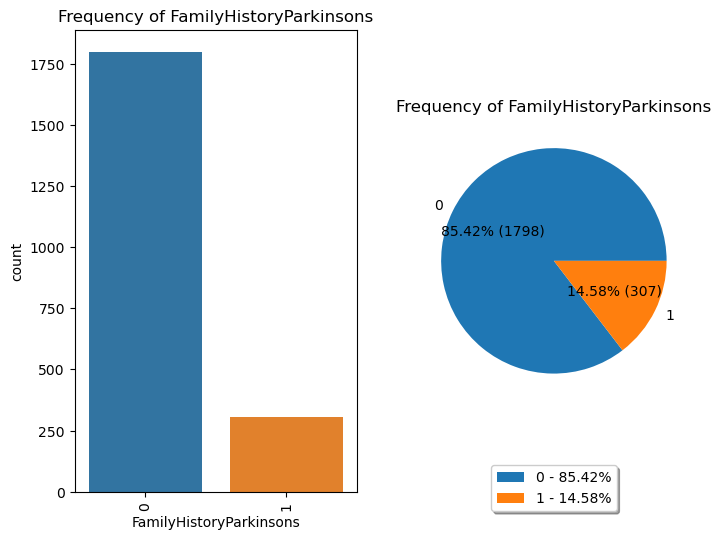

   TraumaticBrainInjury  Ratio
0                  1881 89.359
1                   224 10.641


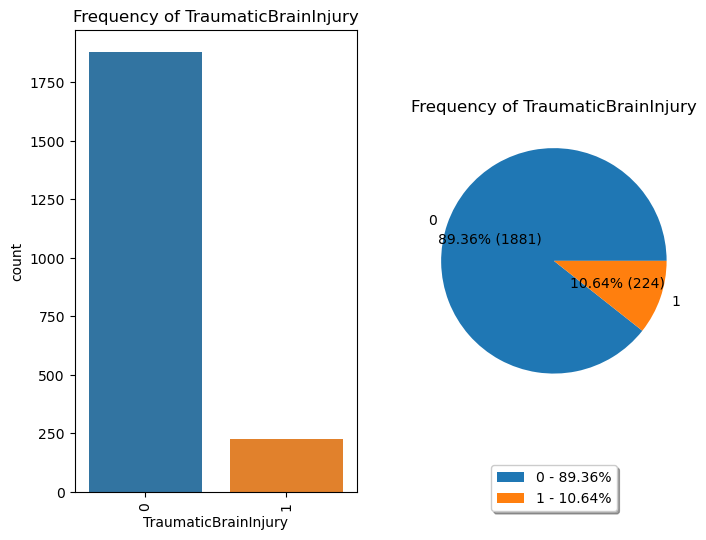

   Hypertension  Ratio
0          1798 85.416
1           307 14.584


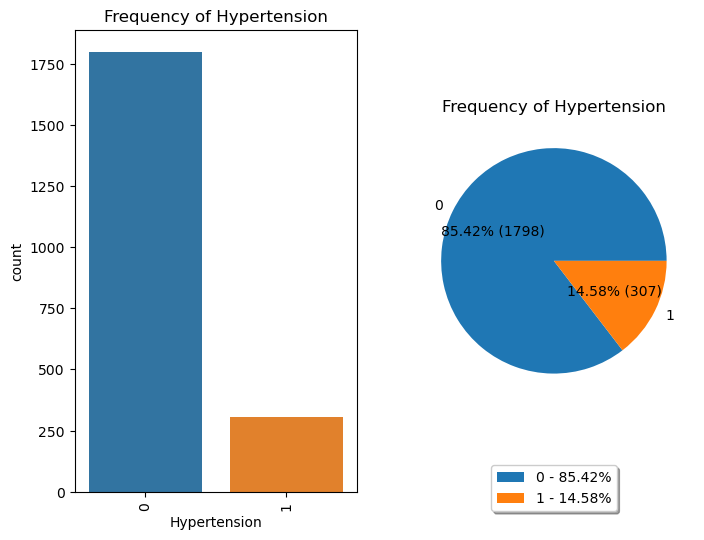

   Diabetes  Ratio
0      1793 85.178
1       312 14.822


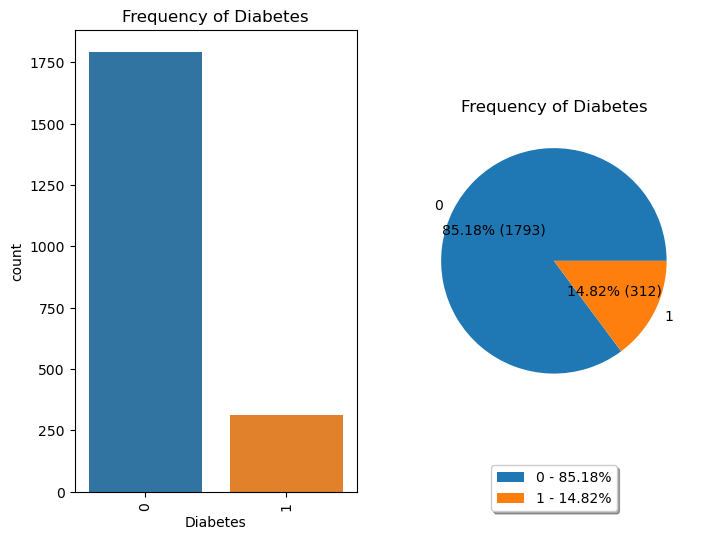

   Depression  Ratio
0        1673 79.477
1         432 20.523


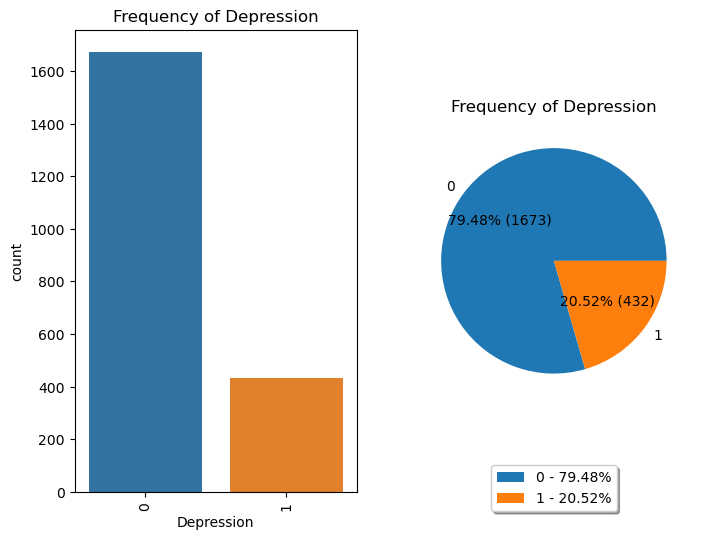

   Stroke  Ratio
0    2002 95.107
1     103  4.893


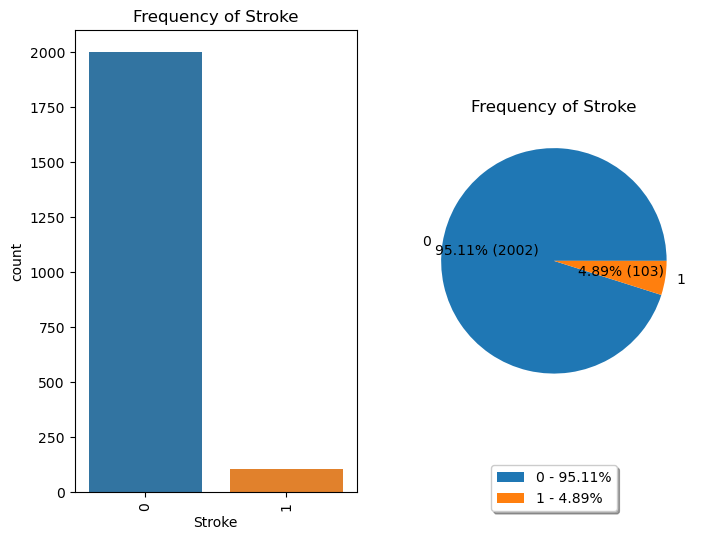

   Tremor  Ratio
0    1196 56.817
1     909 43.183


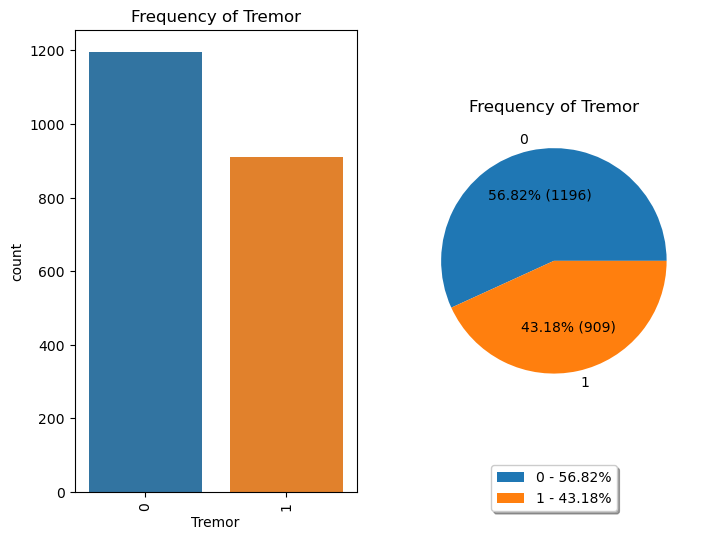

   Rigidity  Ratio
0      1573 74.727
1       532 25.273


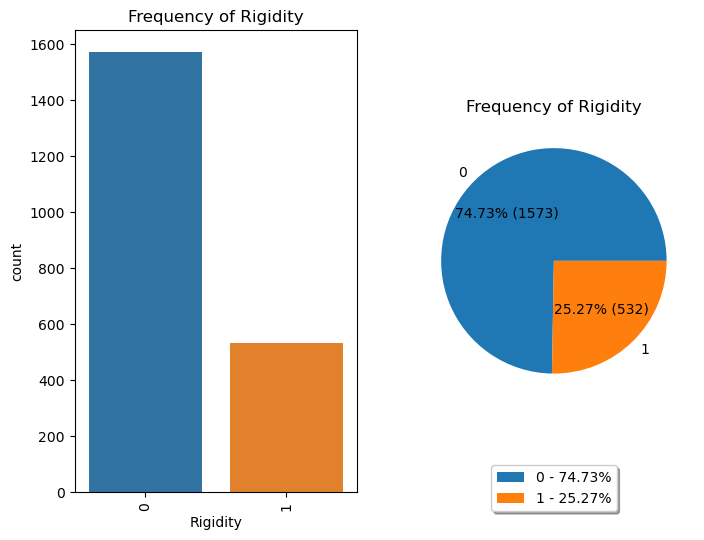

   Bradykinesia  Ratio
0          1668 79.240
1           437 20.760


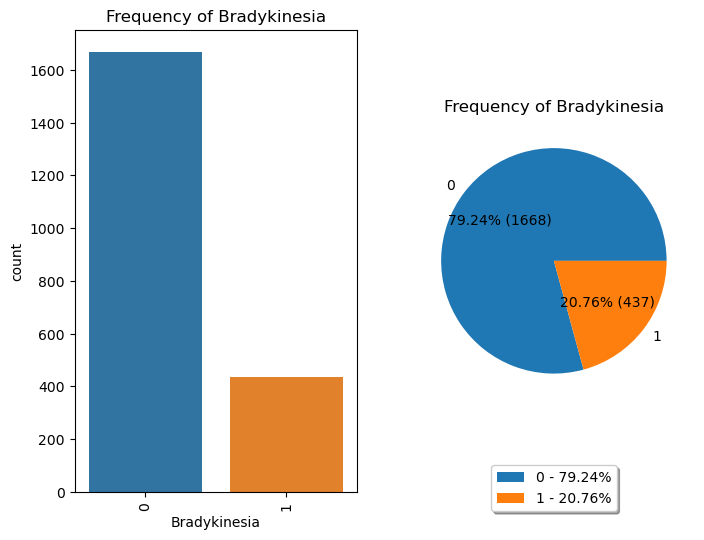

   PosturalInstability  Ratio
0                 1813 86.128
1                  292 13.872


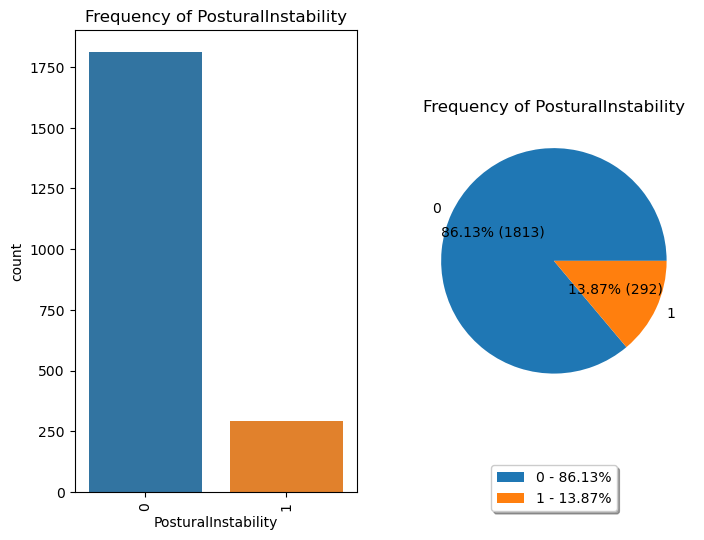

   SpeechProblems  Ratio
0            1484 70.499
1             621 29.501


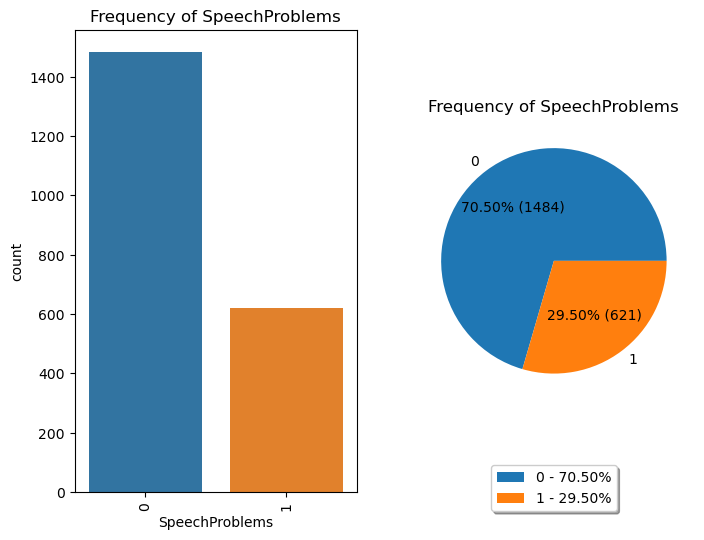

   SleepDisorders  Ratio
0            1589 75.487
1             516 24.513


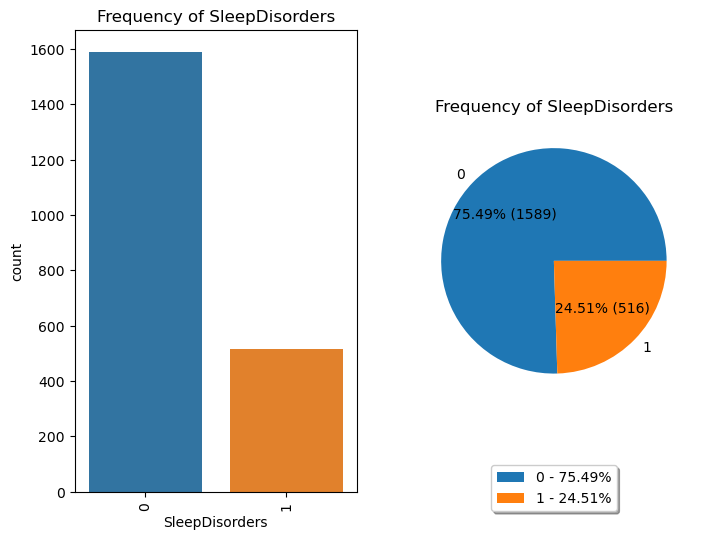

   Constipation  Ratio
0          1480 70.309
1           625 29.691


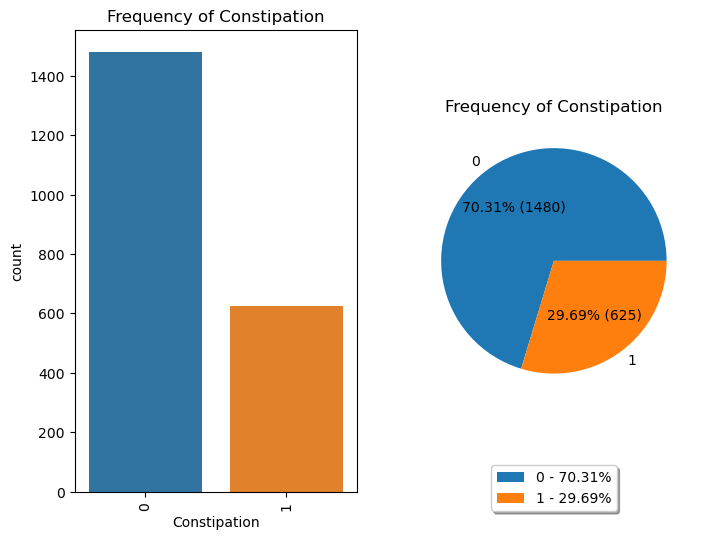

   Diagnosis  Ratio
1       1304 61.948
0        801 38.052


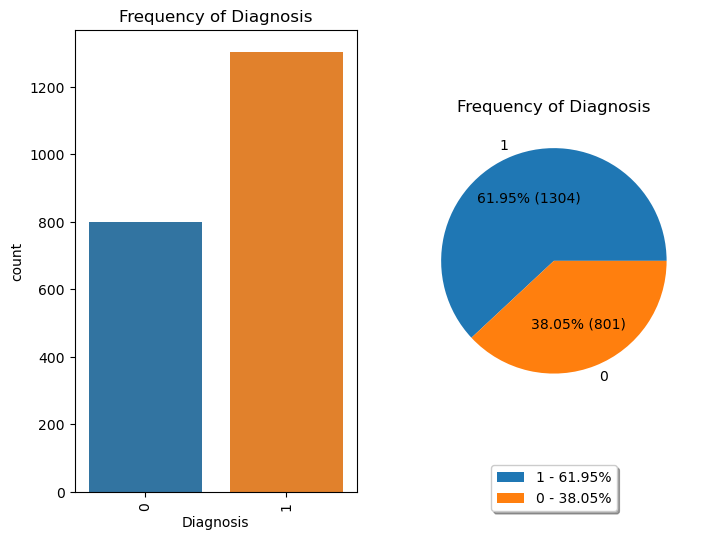

In [14]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        fig, axs = plt.subplots(1, 2, figsize=(8, 6))
        plt.subplot(1, 2, 1)
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.title("Frequency of " + col_name)
        plt.xticks(rotation=90)

        plt.subplot(1, 2, 2)
        values = dataframe[col_name].value_counts()
        plt.pie(x=values, labels=values.index, autopct=lambda p: '{:.2f}% ({:.0f})'.format(p, p/100 * sum(values)))
        plt.title("Frequency of " + col_name)
        plt.legend(labels=['{} - {:.2f}%'.format(index, value/sum(values)*100) for index, value in zip(values.index, values)],
                   loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol=1)
        plt.show(block=True)

for col in cat_cols:
    cat_summary(df, col, True)

PatientID
count   2105.000
mean    4110.000
std      607.805
min     3058.000
5%      3163.200
10%     3268.400
20%     3478.800
30%     3689.200
40%     3899.600
50%     4110.000
60%     4320.400
70%     4530.800
80%     4741.200
90%     4951.600
95%     5056.800
99%     5140.960
max     5162.000
Name: PatientID, dtype: float64


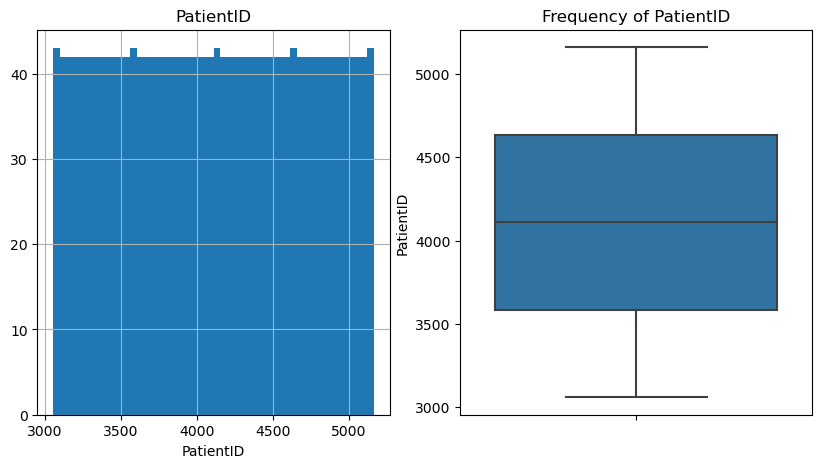

______________________________________________________

Age
count   2105.000
mean      69.602
std       11.595
min       50.000
5%        51.000
10%       53.000
20%       57.000
30%       62.000
40%       66.000
50%       70.000
60%       74.000
70%       77.000
80%       82.000
90%       86.000
95%       88.000
99%       89.000
max       89.000
Name: Age, dtype: float64


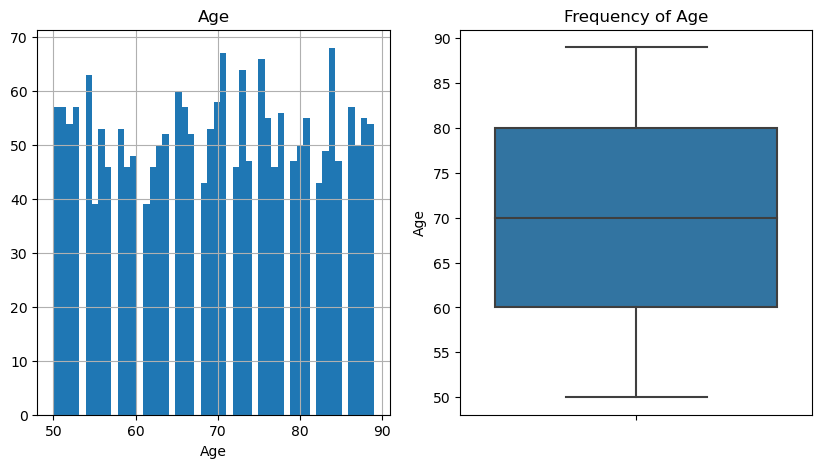

______________________________________________________

BMI
count   2105.000
mean      27.209
std        7.208
min       15.008
5%        16.108
10%       17.494
20%       19.670
30%       22.177
40%       24.424
50%       27.185
60%       29.756
70%       32.199
80%       34.723
90%       37.079
95%       38.574
99%       39.705
max       40.000
Name: BMI, dtype: float64


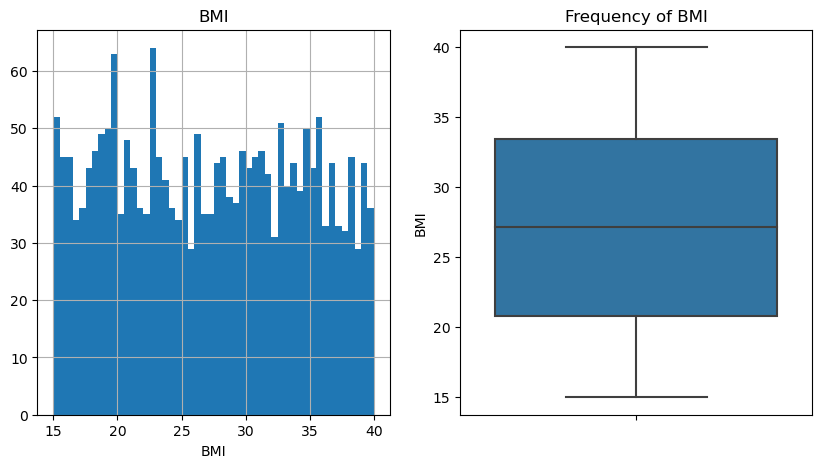

______________________________________________________

AlcoholConsumption
count   2105.000
mean      10.040
std        5.687
min        0.002
5%         1.085
10%        2.224
20%        4.138
30%        6.078
40%        7.950
50%       10.070
60%       12.252
70%       13.890
80%       15.759
90%       17.913
95%       18.880
99%       19.747
max       19.989
Name: AlcoholConsumption, dtype: float64


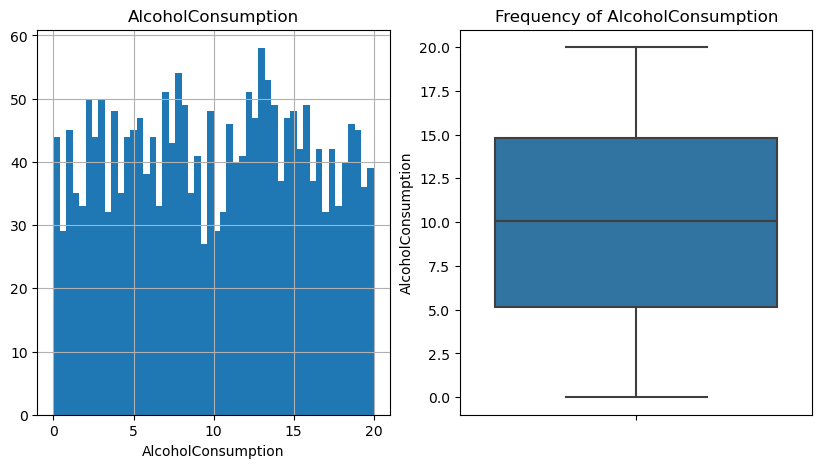

______________________________________________________

PhysicalActivity
count   2105.000
mean       5.017
std        2.891
min        0.004
5%         0.575
10%        1.104
20%        2.048
30%        2.893
40%        3.934
50%        5.032
60%        5.985
70%        7.011
80%        8.063
90%        9.045
95%        9.489
99%        9.889
max        9.995
Name: PhysicalActivity, dtype: float64


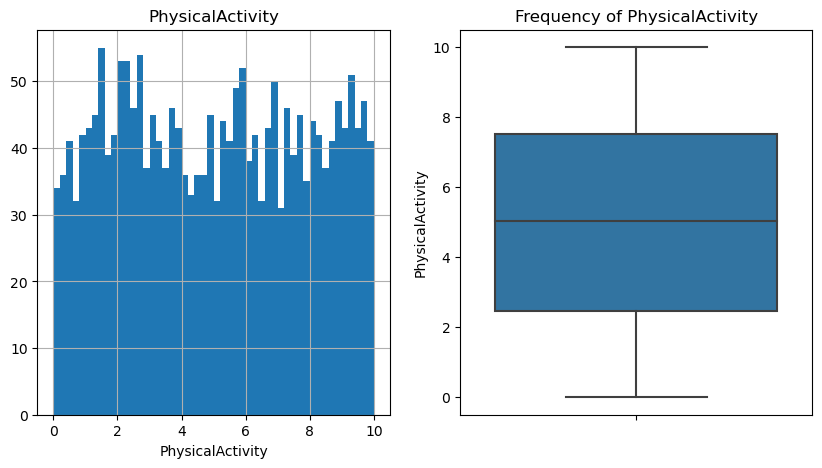

______________________________________________________

DietQuality
count   2105.000
mean       4.913
std        2.872
min        0.000
5%         0.467
10%        0.928
20%        1.959
30%        2.955
40%        3.877
50%        4.825
60%        5.852
70%        6.868
80%        7.885
90%        8.914
95%        9.452
99%        9.901
max        9.996
Name: DietQuality, dtype: float64


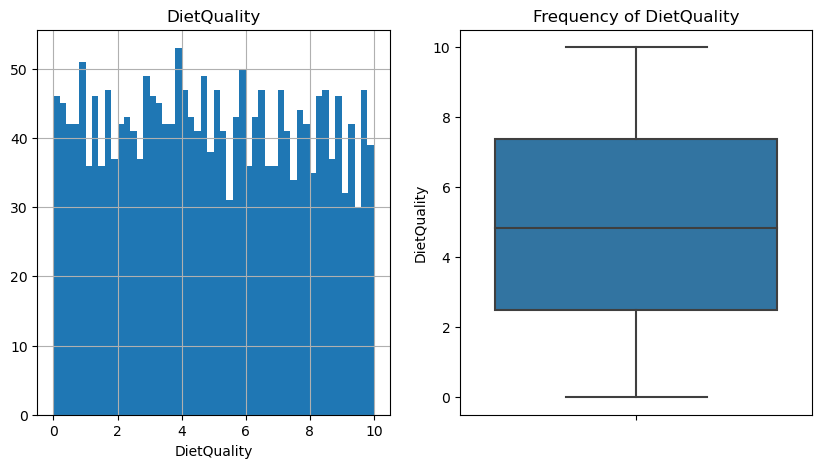

______________________________________________________

SleepQuality
count   2105.000
mean       6.997
std        1.753
min        4.000
5%         4.254
10%        4.541
20%        5.206
30%        5.786
40%        6.368
50%        6.930
60%        7.607
70%        8.257
80%        8.847
90%        9.418
95%        9.700
99%        9.941
max       10.000
Name: SleepQuality, dtype: float64


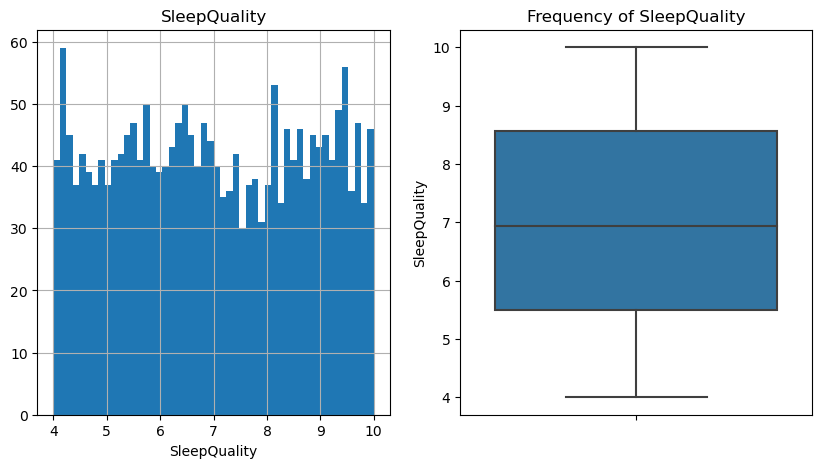

______________________________________________________

SystolicBP
count   2105.000
mean     133.720
std       26.502
min       90.000
5%        94.000
10%       97.400
20%      105.000
30%      115.000
40%      124.000
50%      133.000
60%      143.000
70%      152.000
80%      162.000
90%      171.000
95%      175.000
99%      179.000
max      179.000
Name: SystolicBP, dtype: float64


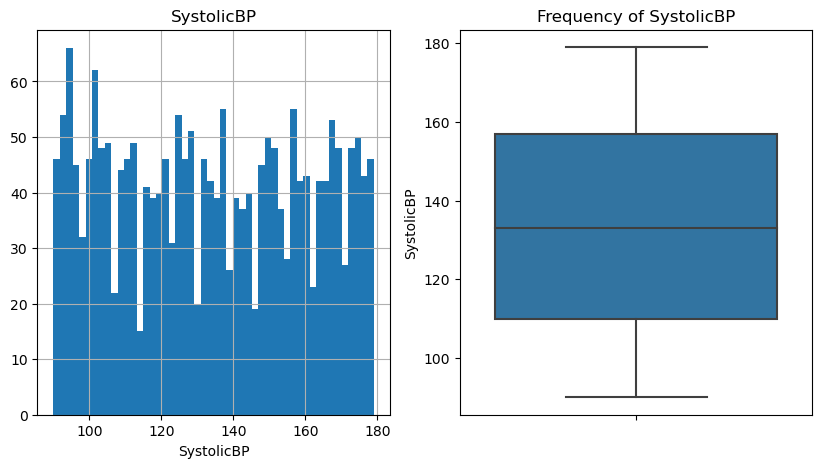

______________________________________________________

DiastolicBP
count   2105.000
mean      90.250
std       17.061
min       60.000
5%        63.000
10%       66.000
20%       72.000
30%       79.000
40%       85.000
50%       91.000
60%       96.000
70%      102.000
80%      108.000
90%      113.000
95%      116.000
99%      119.000
max      119.000
Name: DiastolicBP, dtype: float64


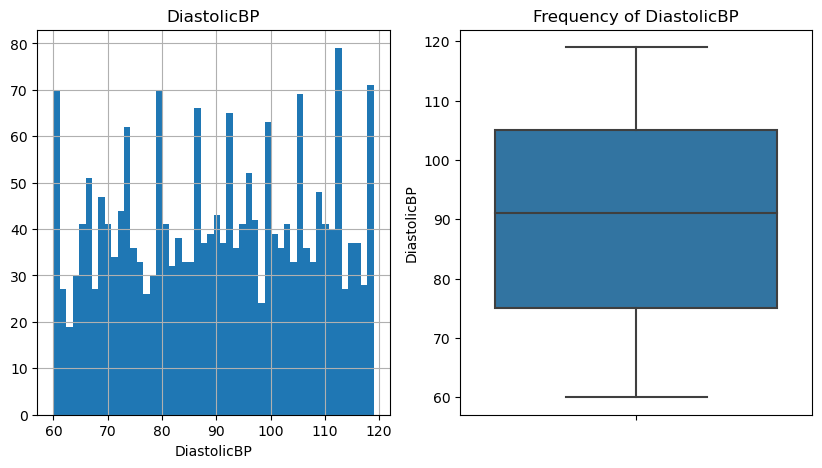

______________________________________________________

CholesterolTotal
count   2105.000
mean     226.861
std       43.589
min      150.063
5%       157.359
10%      165.797
20%      181.048
30%      197.805
40%      212.541
50%      228.528
60%      242.283
70%      257.794
80%      272.030
90%      286.461
95%      293.105
99%      298.939
max      299.963
Name: CholesterolTotal, dtype: float64


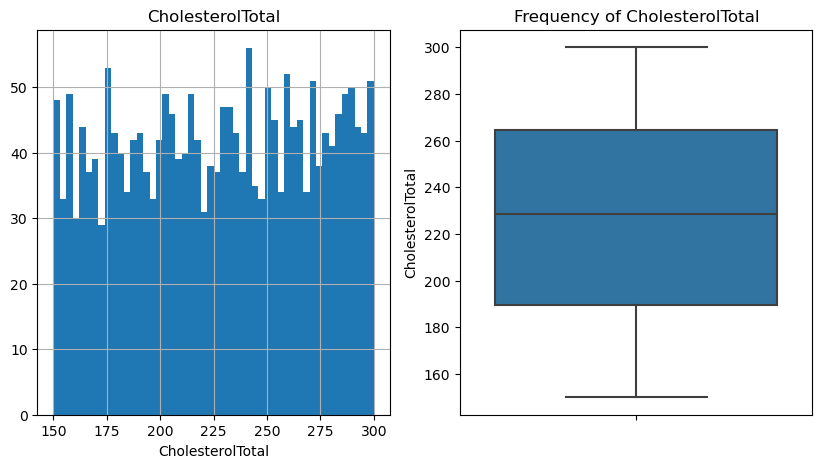

______________________________________________________

CholesterolLDL
count   2105.000
mean     126.148
std       43.407
min       50.023
5%        58.013
10%       66.682
20%       81.030
30%       95.390
40%      111.319
50%      126.885
60%      141.268
70%      155.826
80%      171.094
90%      186.198
95%      193.239
99%      198.731
max      199.986
Name: CholesterolLDL, dtype: float64


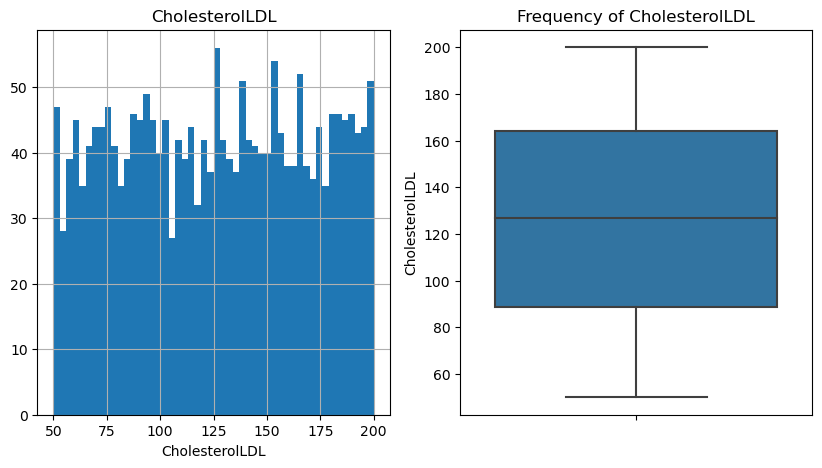

______________________________________________________

CholesterolHDL
count   2105.000
mean      59.670
std       23.371
min       20.028
5%        23.242
10%       26.828
20%       34.974
30%       43.975
40%       52.027
50%       59.343
60%       67.960
70%       75.263
80%       83.168
90%       92.622
95%       96.619
99%       99.301
max       99.982
Name: CholesterolHDL, dtype: float64


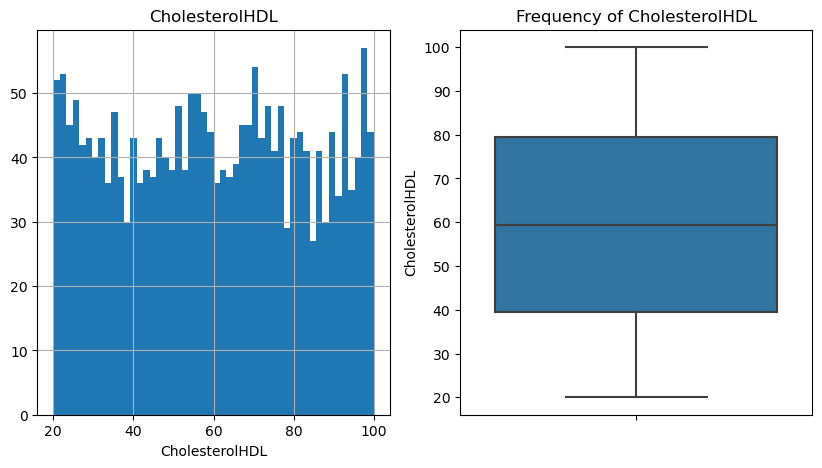

______________________________________________________

CholesterolTriglycerides
count   2105.000
mean     222.940
std      101.896
min       50.114
5%        66.072
10%       82.543
20%      116.358
30%      150.851
40%      187.861
50%      222.802
60%      256.720
70%      292.550
80%      329.196
90%      365.561
95%      382.751
99%      397.305
max      399.975
Name: CholesterolTriglycerides, dtype: float64


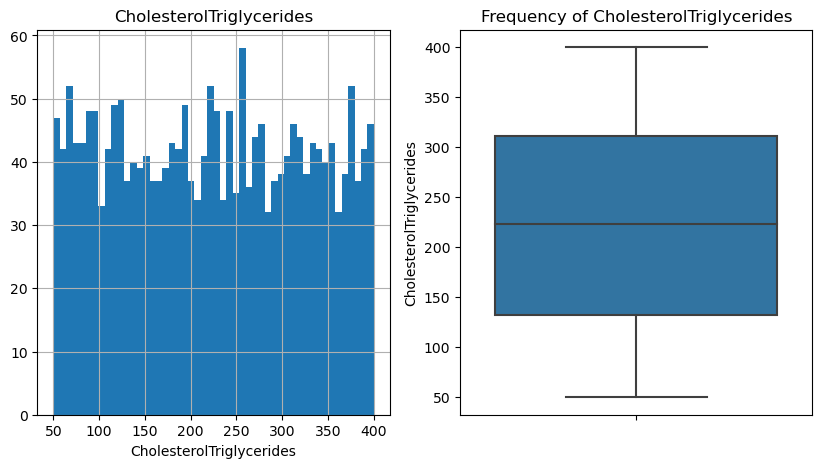

______________________________________________________

UPDRS
count   2105.000
mean     101.415
std       56.591
min        0.028
5%        10.406
10%       21.511
20%       42.903
30%       63.097
40%       84.814
50%      102.561
60%      121.411
70%      139.150
80%      159.881
90%      178.815
95%      189.420
99%      197.656
max      198.954
Name: UPDRS, dtype: float64


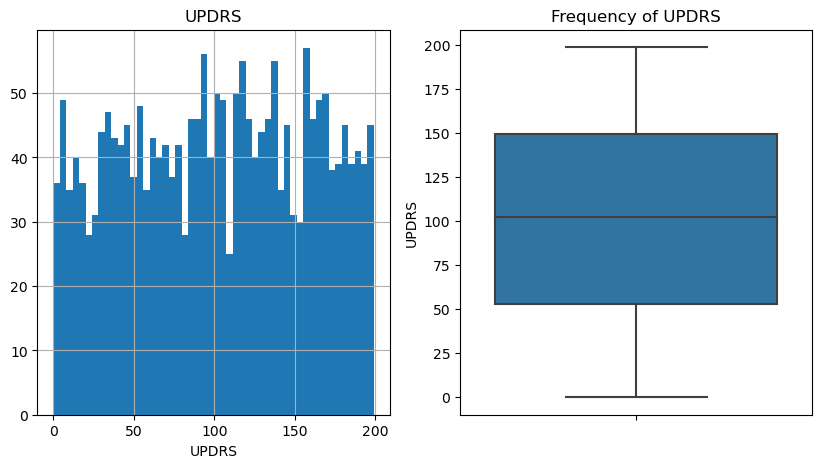

______________________________________________________

MoCA
count   2105.000
mean      15.094
std        8.643
min        0.021
5%         1.622
10%        3.040
20%        6.318
30%        9.082
40%       11.985
50%       14.964
60%       18.453
70%       21.369
80%       23.906
90%       26.904
95%       28.407
99%       29.546
max       29.970
Name: MoCA, dtype: float64


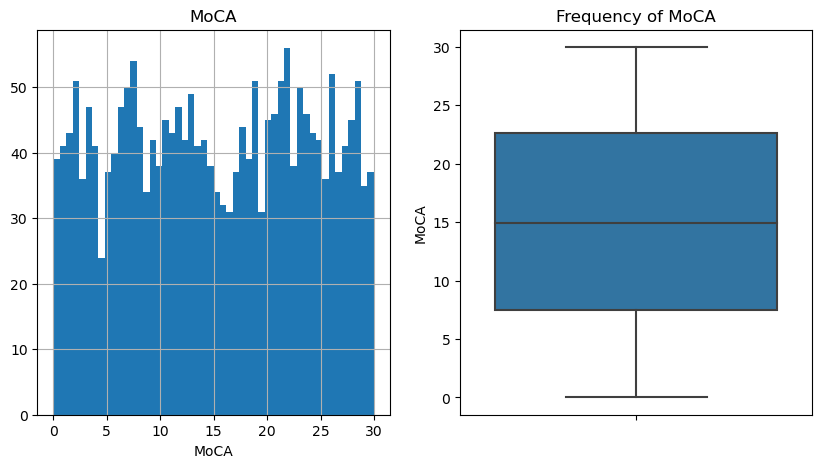

______________________________________________________

FunctionalAssessment
count   2105.000
mean       4.990
std        2.934
min        0.002
5%         0.403
10%        0.961
20%        1.917
30%        2.898
40%        3.975
50%        4.983
60%        6.025
70%        6.954
80%        8.047
90%        9.037
95%        9.599
99%        9.920
max        9.993
Name: FunctionalAssessment, dtype: float64


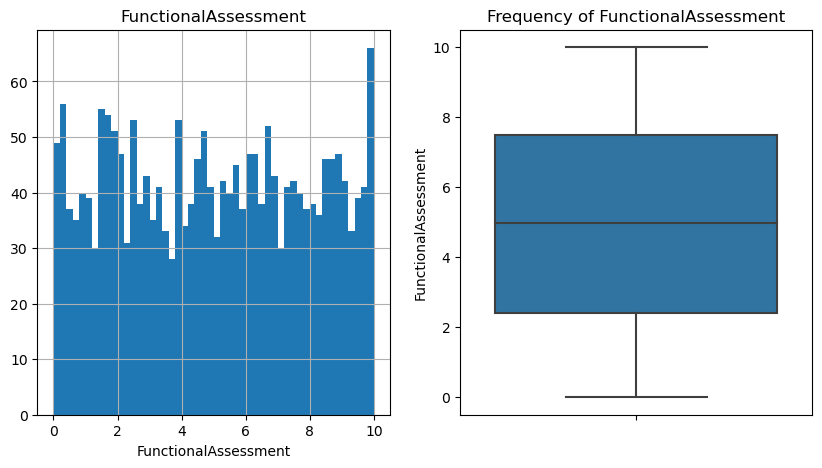

______________________________________________________



In [15]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
            fig, axs = plt.subplots(1, 2, figsize=(10, 5))
            plt.subplot(1, 2, 1)
            dataframe[numerical_col].hist(bins=50)
            plt.xlabel(numerical_col)
            plt.title(numerical_col)

            plt.subplot(1, 2, 2)
            sns.boxplot(y=numerical_col, data=dataframe)
            plt.title("Frequency of " + numerical_col)
            plt.xticks(rotation=90)

            plt.show(block=True)      

            print("______________________________________________________\n")

for col in num_cols:
    print(col)
    num_summary(df, col, plot=True)

In [16]:
cols = ['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI',
       'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
       'SleepQuality', 'FamilyHistoryParkinsons', 'TraumaticBrainInjury',
       'Hypertension', 'Diabetes', 'Depression', 'Stroke', 'SystolicBP',
       'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'UPDRS', 'MoCA', 'FunctionalAssessment',
       'Tremor', 'Rigidity', 'Bradykinesia', 'PosturalInstability',
       'SpeechProblems', 'SleepDisorders', 'Constipation']

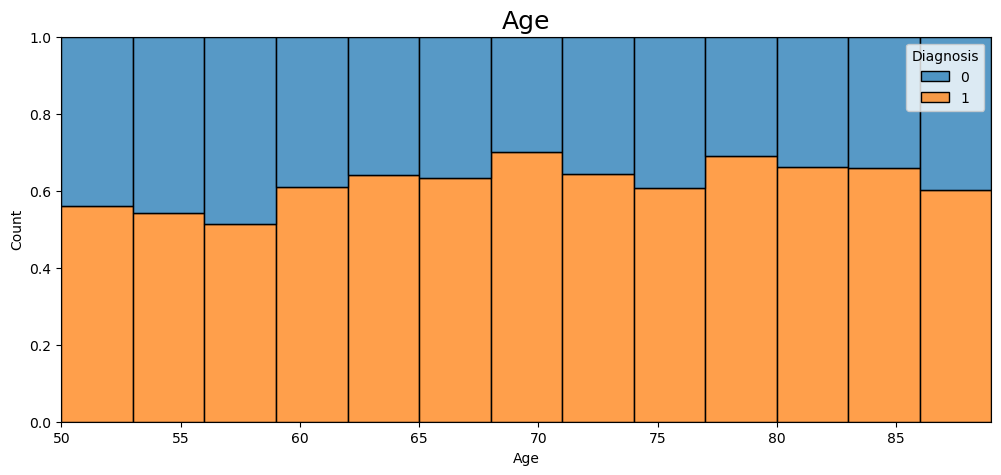

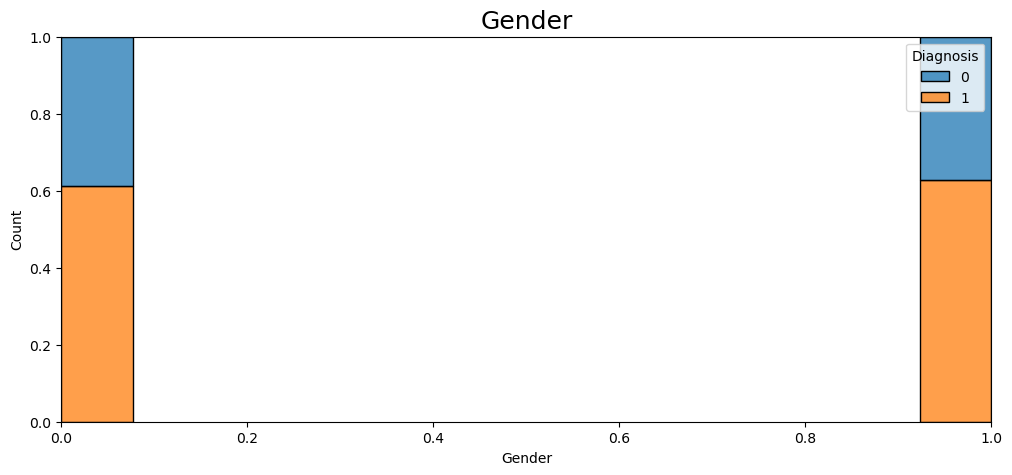

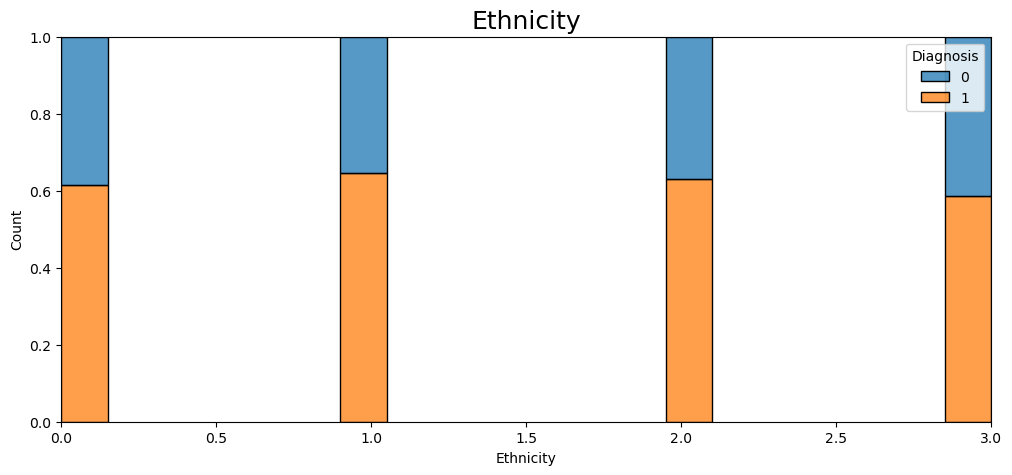

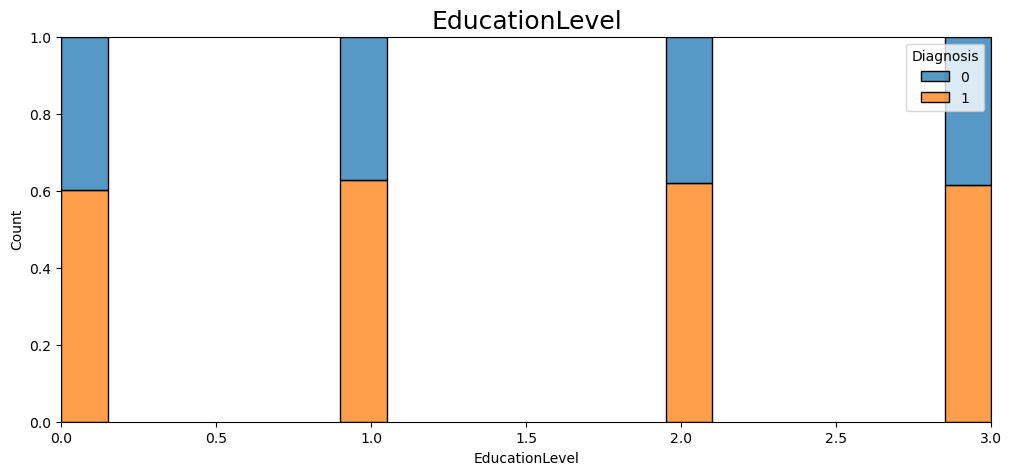

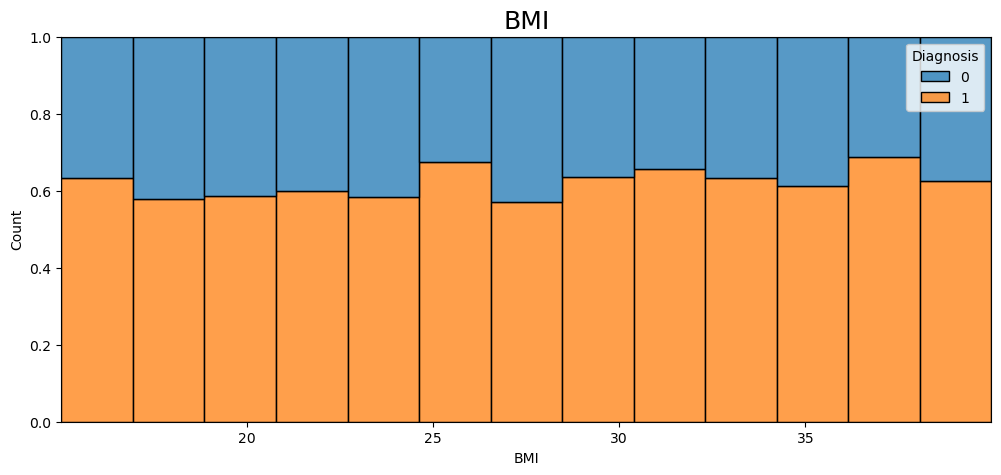

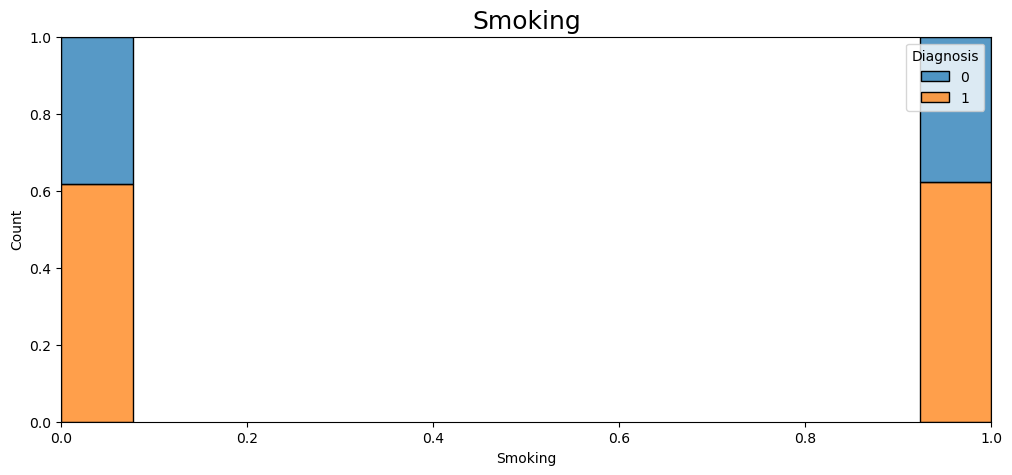

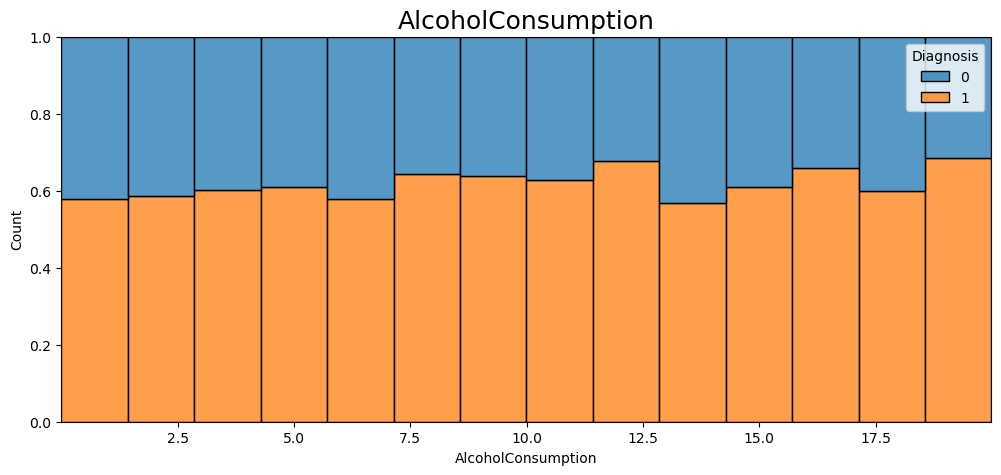

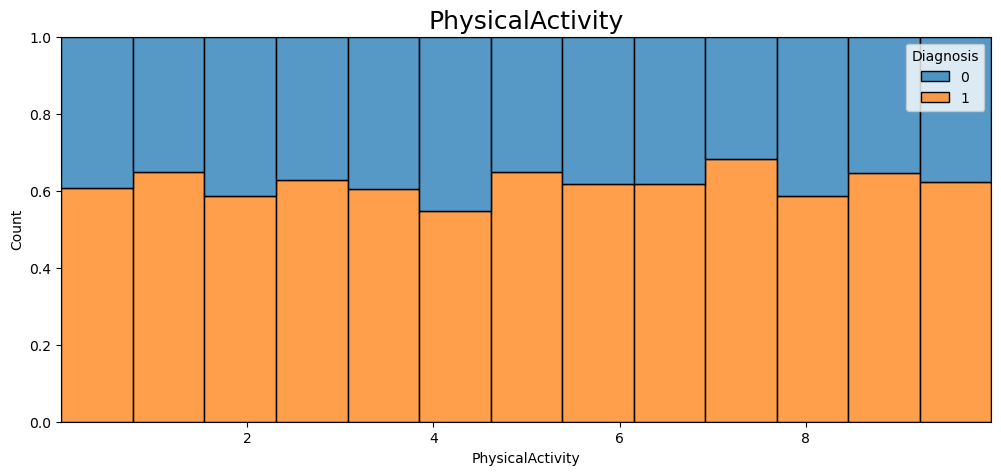

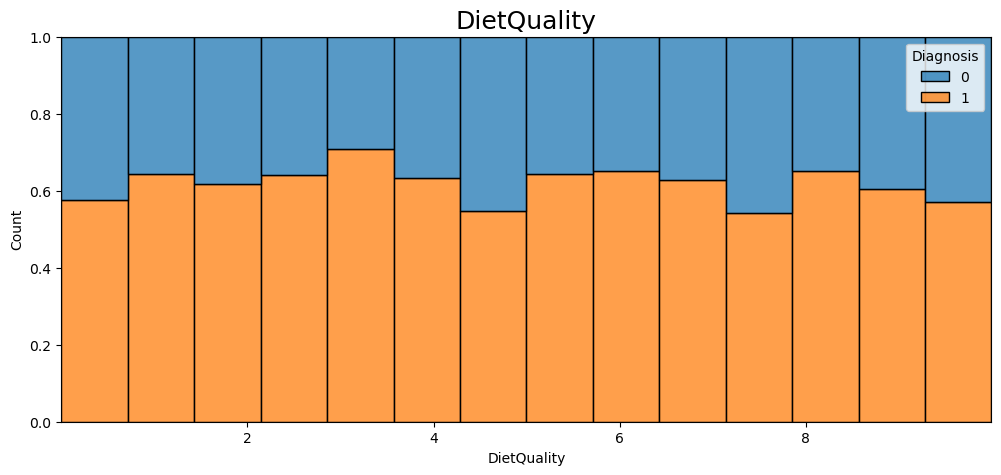

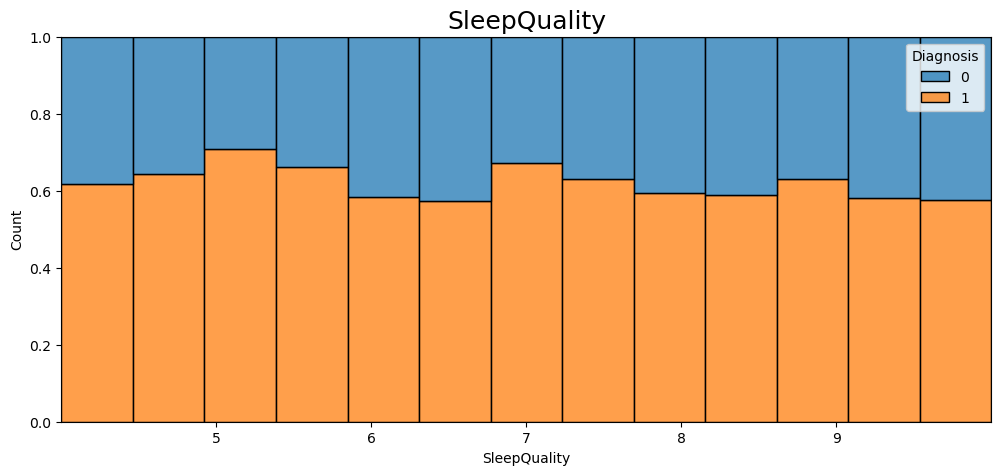

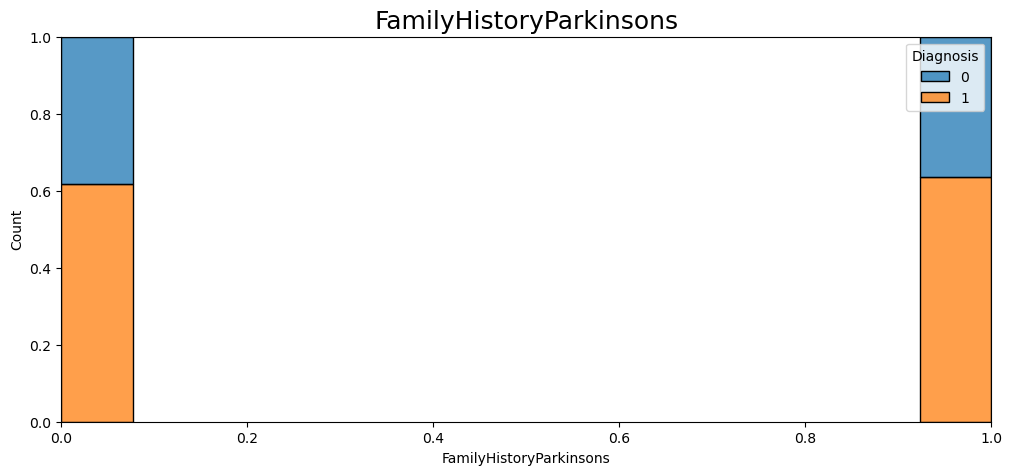

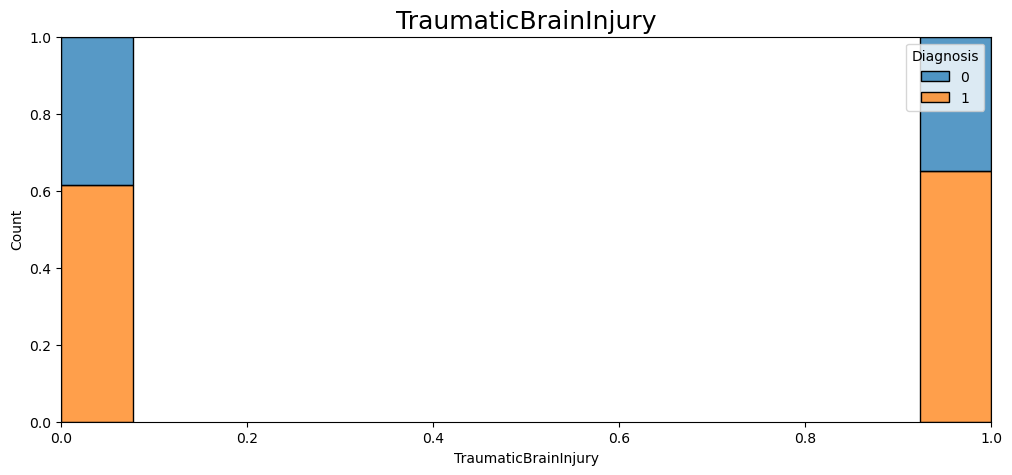

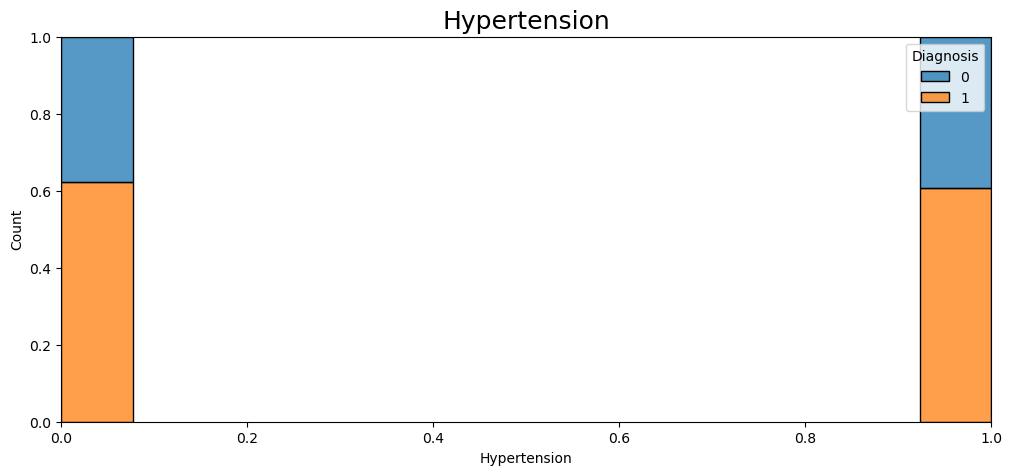

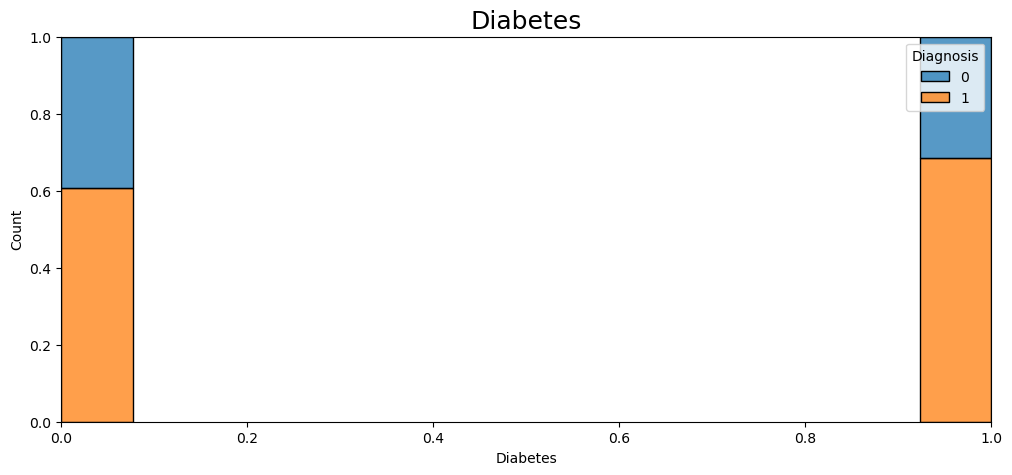

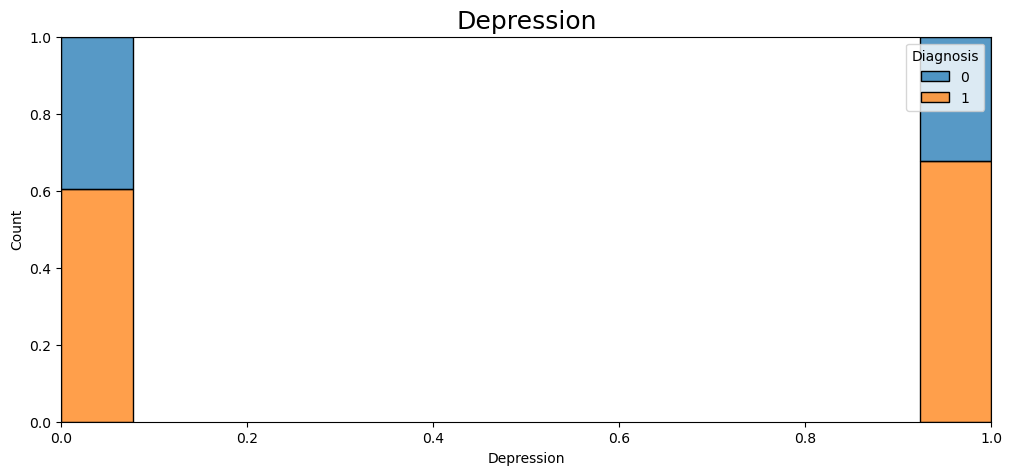

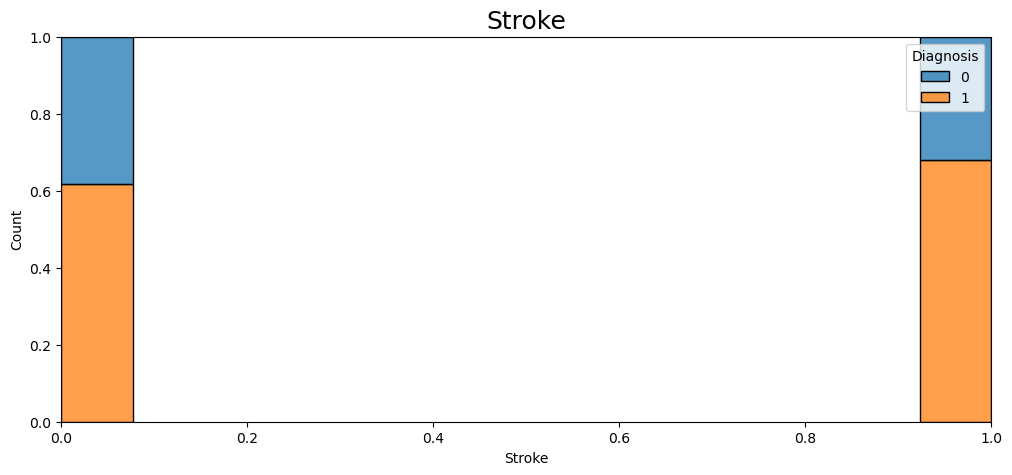

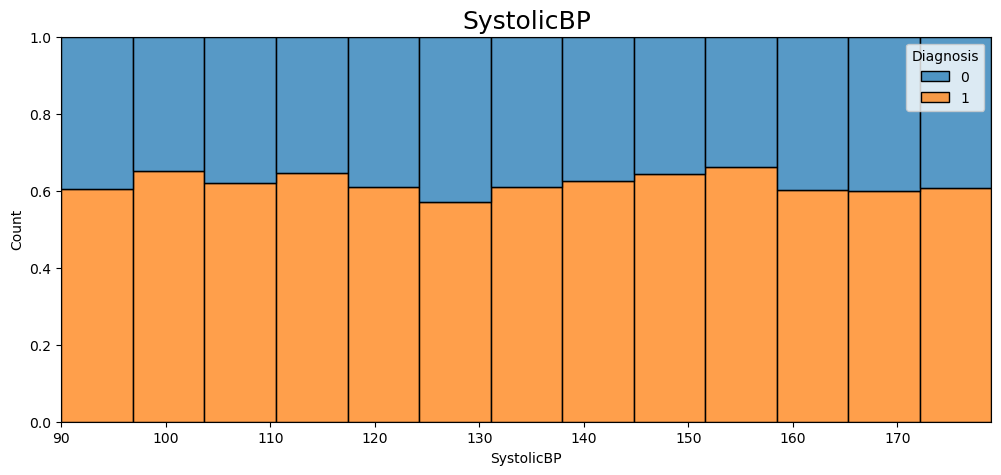

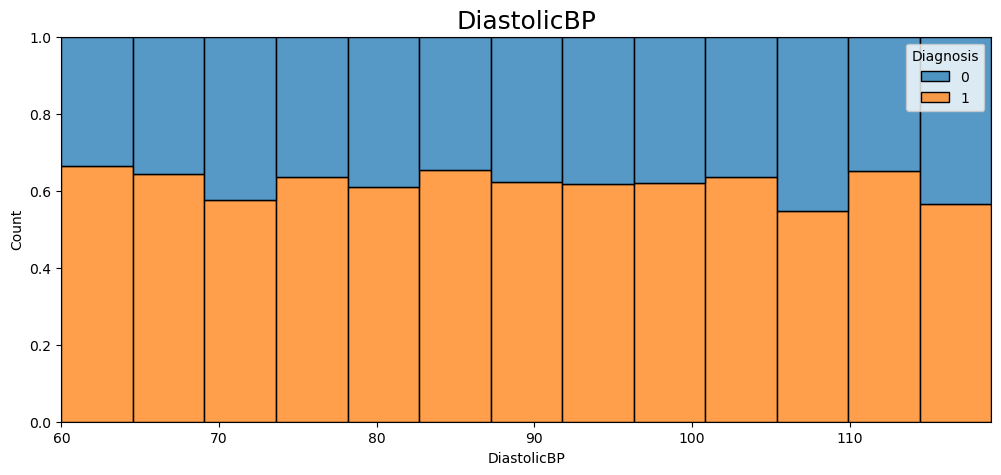

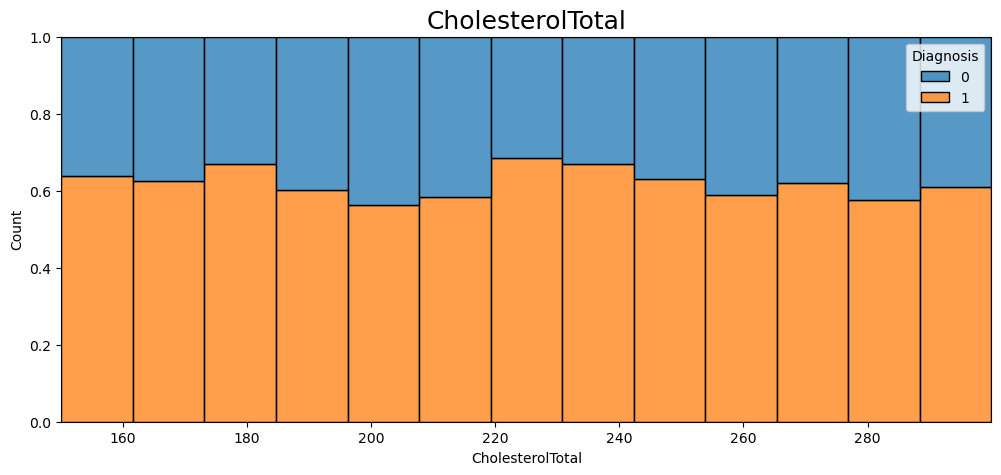

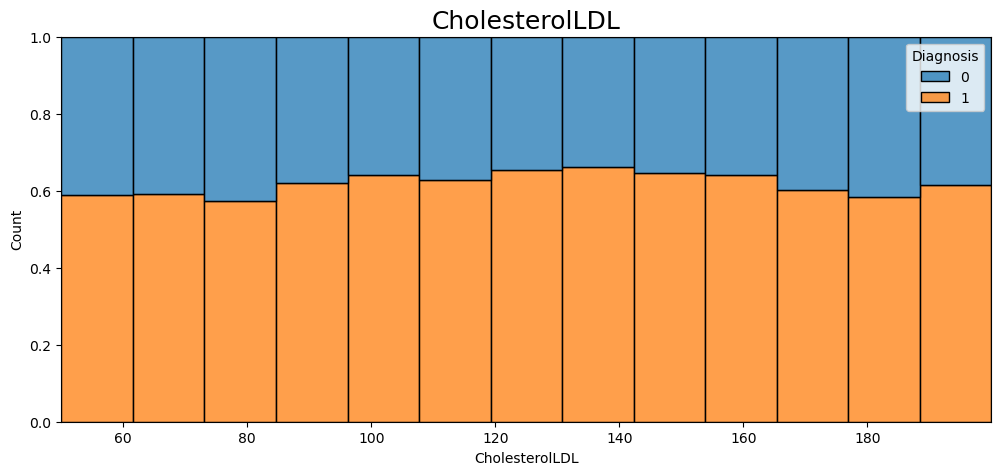

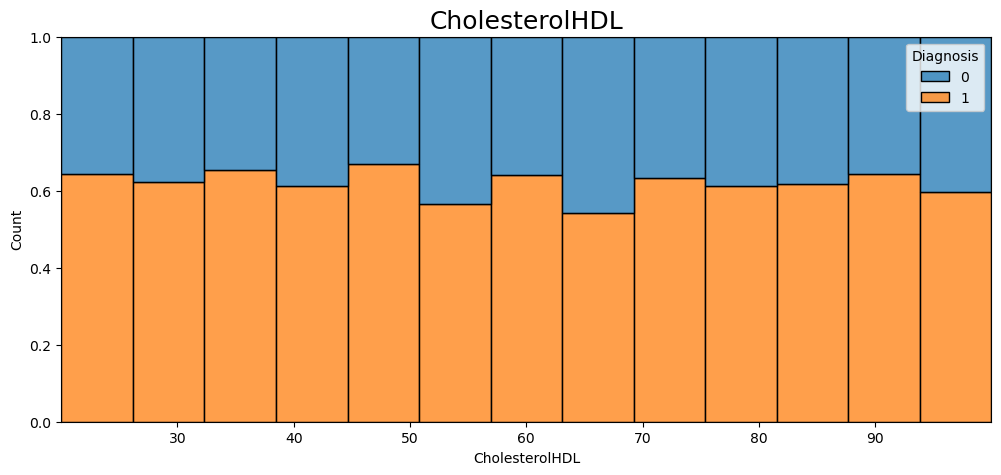

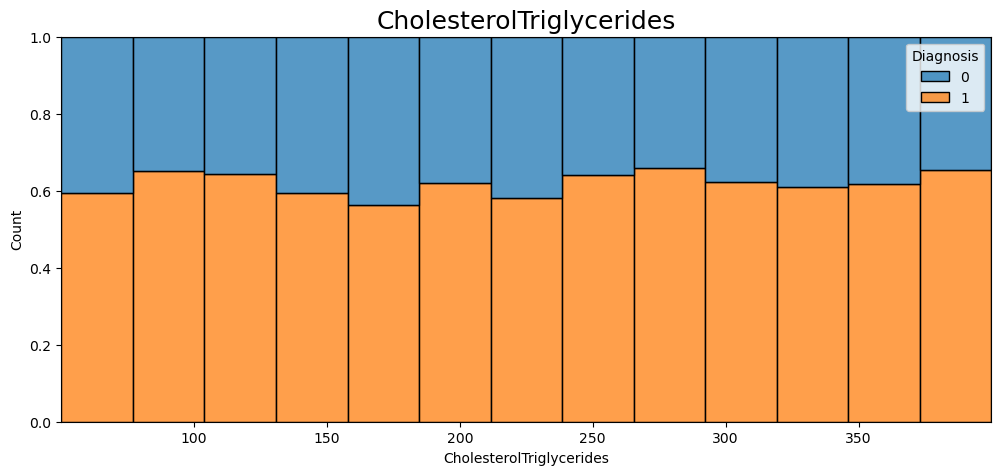

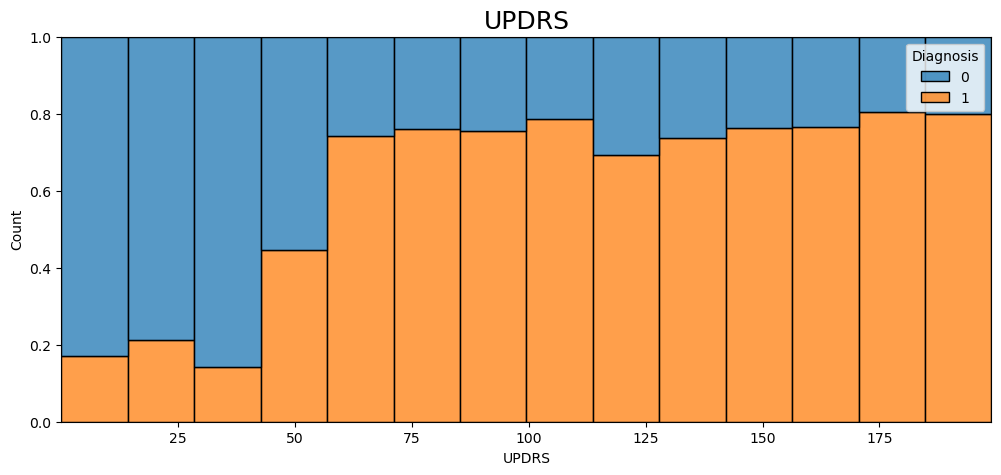

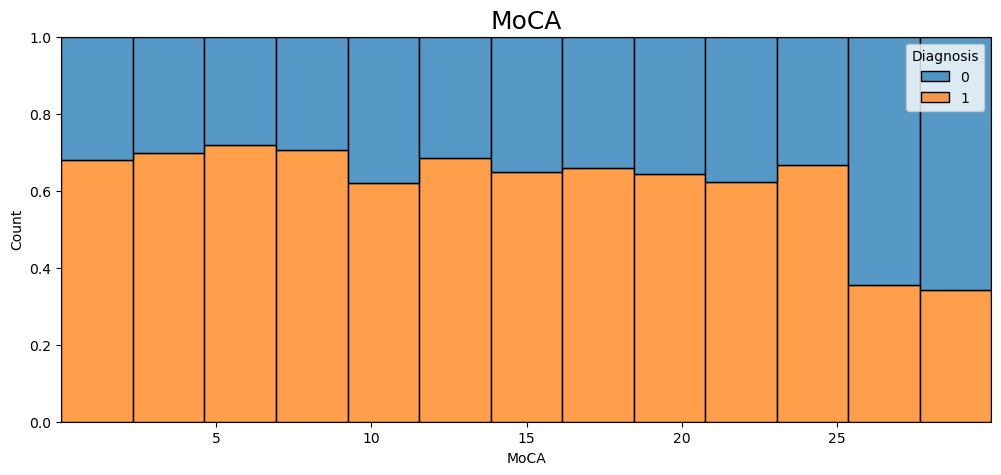

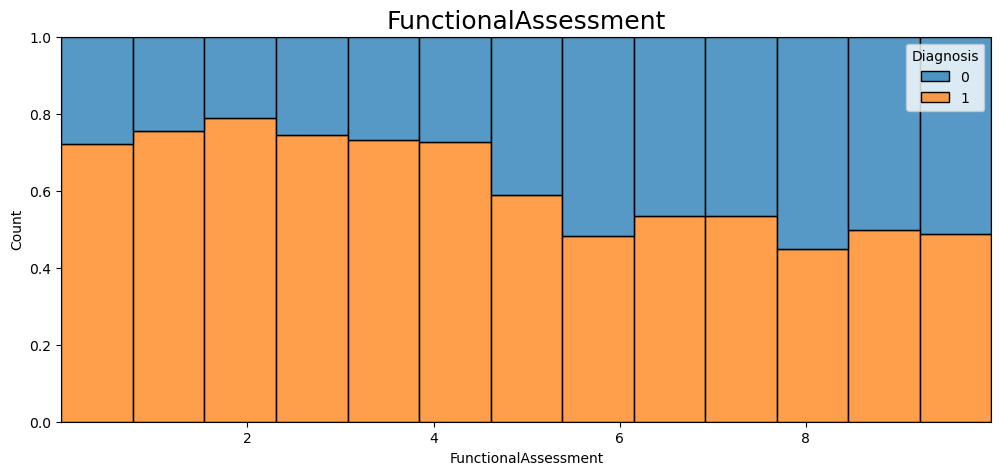

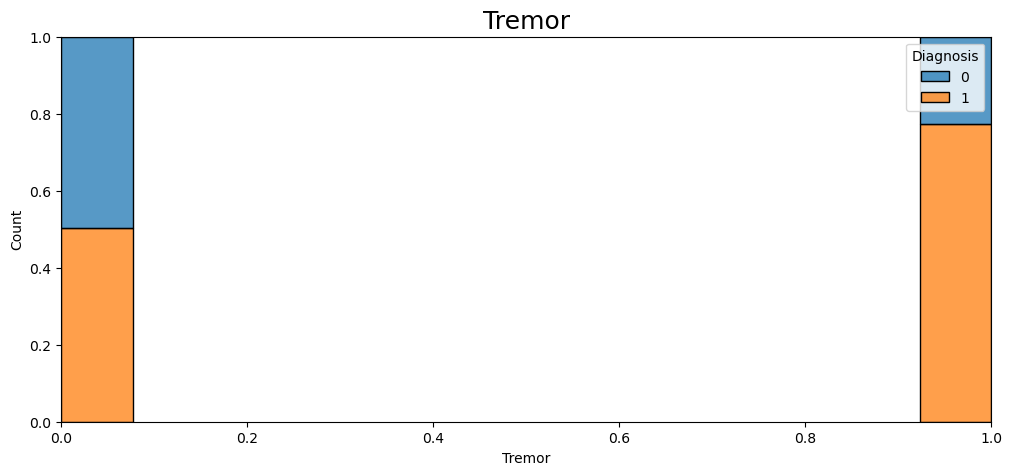

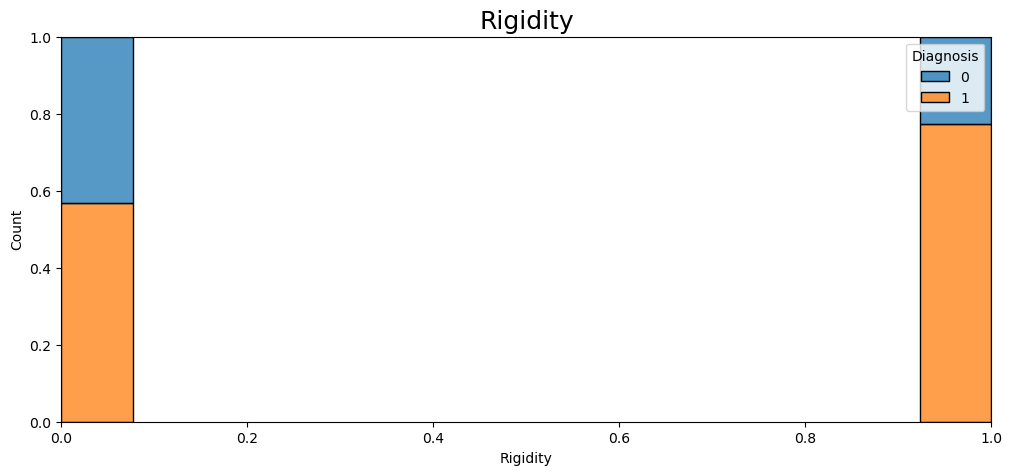

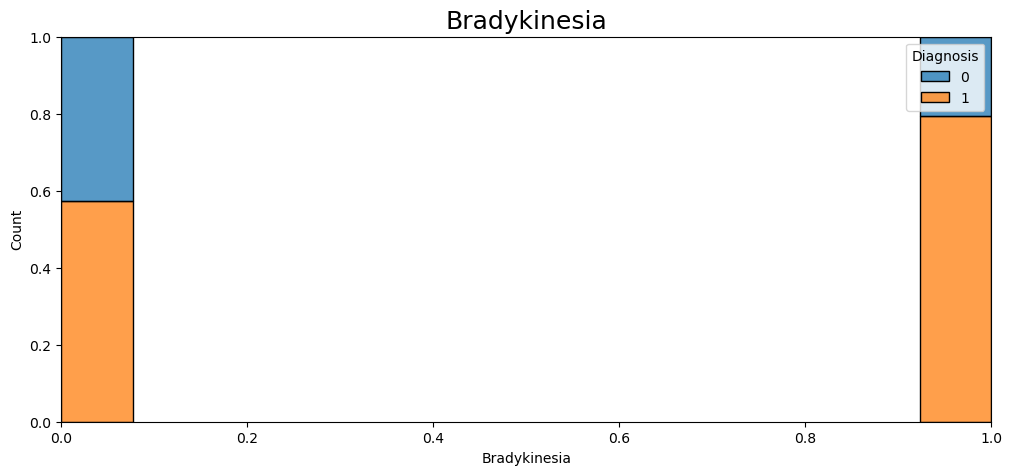

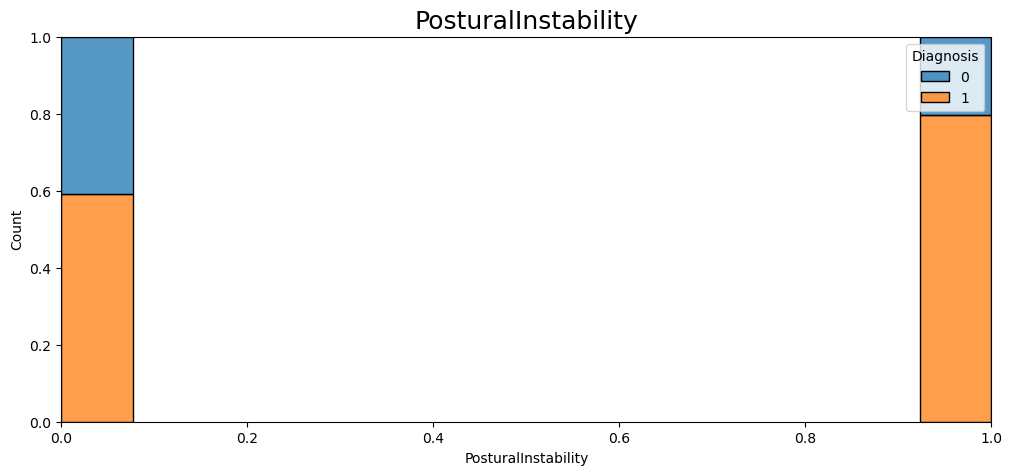

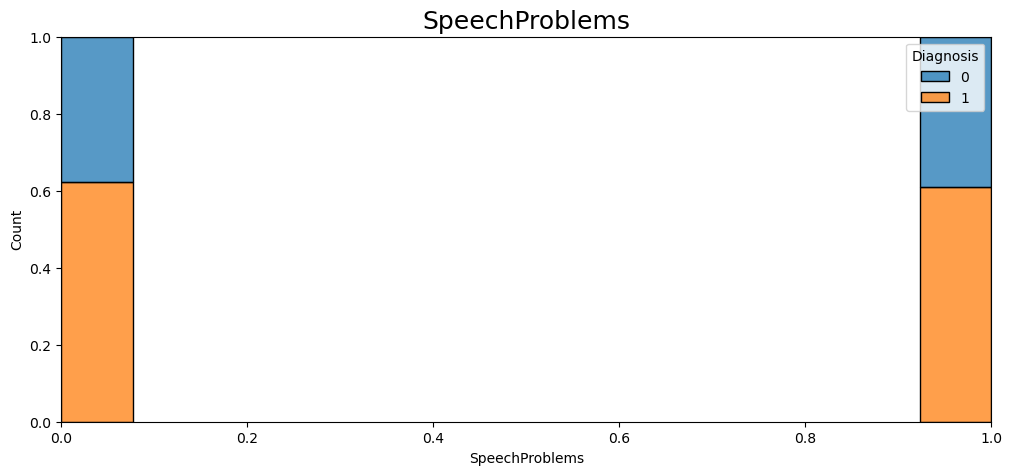

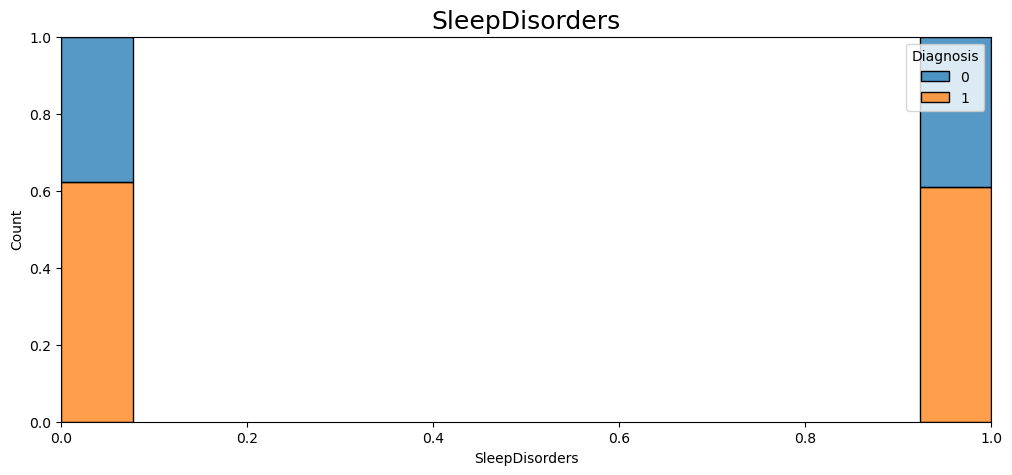

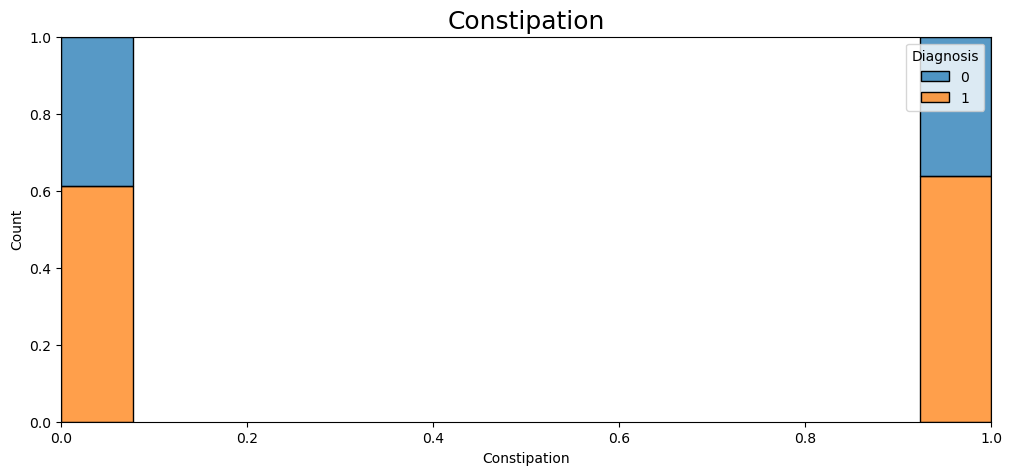

In [17]:
# Features Histogram Features vs Target
for col in cols:
    fig, ax = plt.subplots(figsize=(12, 5))
    sns.histplot(data=df, x=col, hue="Diagnosis", multiple="fill")
    plt.title(col, fontsize = 18)
    plt.show()

In [18]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

for col in num_cols:
    target_summary_with_num(df, "Diagnosis", col)

           PatientID
Diagnosis           
0           4143.733
1           4089.279


             Age
Diagnosis       
0         68.635
1         70.196


             BMI
Diagnosis       
0         26.933
1         27.380


           AlcoholConsumption
Diagnosis                    
0                       9.774
1                      10.204


           PhysicalActivity
Diagnosis                  
0                     4.969
1                     5.046


           DietQuality
Diagnosis             
0                4.997
1                4.861


           SleepQuality
Diagnosis              
0                 7.093
1                 6.937


           SystolicBP
Diagnosis            
0             133.869
1             133.628


           DiastolicBP
Diagnosis             
0               90.883
1               89.861


           CholesterolTotal
Diagnosis                  
0                   227.917
1                   226.212


           CholesterolLDL
Diagnosis             

In [19]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
0,3058,85,0,3,1,19.620,0,5.108,1.381,3.894,9.283,0,0,0,0,0,0,129,60,222.842,148.126,37.868,337.307,6.459,29.181,1.572,1,0,0,0,0,0,0,0
1,3059,75,0,0,2,16.247,1,6.028,8.410,8.513,5.602,0,0,0,0,0,0,163,76,210.501,153.756,77.228,264.636,37.307,12.333,4.788,0,1,0,1,0,1,0,1
2,3060,70,1,0,0,15.368,0,2.242,0.213,6.499,9.930,0,0,0,1,0,0,113,93,287.388,118.703,85.588,395.663,67.838,29.928,2.131,1,0,0,0,1,0,1,1
3,3061,52,0,0,0,15.455,0,5.998,1.375,6.715,4.196,0,0,0,0,0,0,146,78,280.340,136.299,51.870,362.190,52.965,21.304,3.391,1,1,1,0,0,0,1,1
4,3062,87,0,0,1,18.616,0,9.775,1.189,4.658,9.364,0,0,0,0,0,0,115,94,284.014,108.449,25.069,149.957,21.805,8.336,3.201,0,0,0,1,0,1,0,0


In [20]:
def outlier_thresholds(dataframe, col_name, q1=0.10, q3=0.90):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable, q1=0.05, q3=0.95):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.05, q3=0.95)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [21]:
for col in df[num_cols].columns:
    print(col, check_outlier(df, col))
    if check_outlier(df, col):
        replace_with_thresholds(df, col)

PatientID False
Age False
BMI False
AlcoholConsumption False
PhysicalActivity False
DietQuality False
SleepQuality False
SystolicBP False
DiastolicBP False
CholesterolTotal False
CholesterolLDL False
CholesterolHDL False
CholesterolTriglycerides False
UPDRS False
MoCA False
FunctionalAssessment False


In [22]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 2105
Variables: 34
cat_cols: 18
num_cols: 16
cat_but_car: 0
num_but_cat: 18


In [23]:
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryParkinsons,TraumaticBrainInjury,Hypertension,Diabetes,Depression,Stroke,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,UPDRS,MoCA,FunctionalAssessment,Tremor,Rigidity,Bradykinesia,PosturalInstability,SpeechProblems,SleepDisorders,Constipation,Diagnosis
0,0.000,0.897,0,3,1,0.185,0,0.255,0.138,0.390,0.881,0,0,0,0,0,0,0.438,0.000,0.486,0.654,0.223,0.821,0.032,0.974,0.157,1,0,0,0,0,0,0,0
1,0.000,0.641,0,0,2,0.050,1,0.301,0.841,0.852,0.267,0,0,0,0,0,0,0.820,0.271,0.403,0.692,0.715,0.613,0.187,0.411,0.479,0,1,0,1,0,1,0,1
2,0.001,0.513,1,0,0,0.014,0,0.112,0.021,0.650,0.988,0,0,0,1,0,0,0.258,0.559,0.916,0.458,0.820,0.988,0.341,0.999,0.213,1,0,0,0,1,0,1,1
3,0.001,0.051,0,0,0,0.018,0,0.300,0.137,0.672,0.033,0,0,0,0,0,0,0.629,0.305,0.869,0.575,0.398,0.892,0.266,0.711,0.339,1,1,1,0,0,0,1,1
4,0.002,0.949,0,0,1,0.144,0,0.489,0.119,0.466,0.894,0,0,0,0,0,0,0.281,0.576,0.894,0.390,0.063,0.285,0.109,0.278,0.320,0,0,0,1,0,1,0,0


<Axes: >

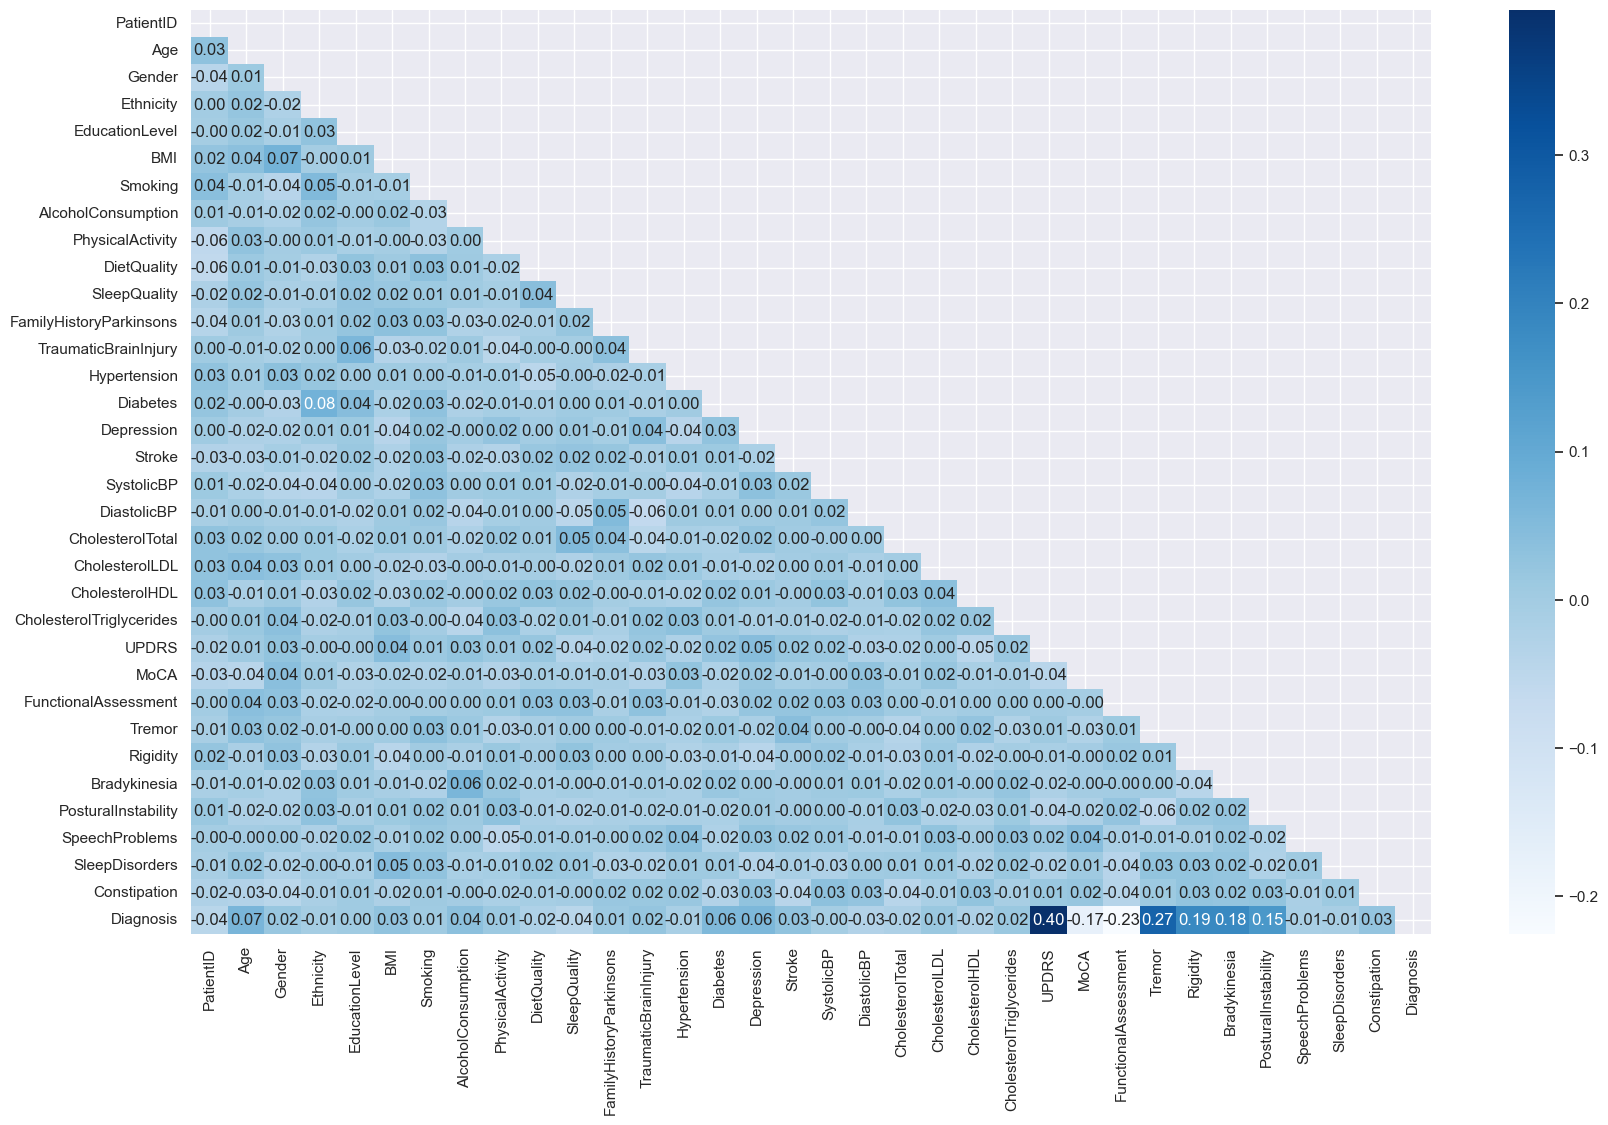

In [24]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.set(rc={'figure.figsize': (20, 12)})
sns.heatmap(corr, mask = mask, cmap="Blues", annot=True, fmt=".2f")

In [25]:
y = df["Diagnosis"]
X = df.drop("Diagnosis", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rf_model = RandomForestClassifier(random_state=42).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [26]:
print(f"Accuracy : {round(accuracy_score(y_pred, y_test), 2)}")
print(f"Recall   : {round(recall_score(y_pred,y_test),3)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 2)}")
print(f"F1       : {round(f1_score(y_pred,y_test), 2)}")
print(f"Auc      : {round(roc_auc_score(y_pred,y_test), 2)}")

Accuracy : 0.9
Recall   : 0.927
Precision: 0.92
F1       : 0.92
Auc      : 0.89


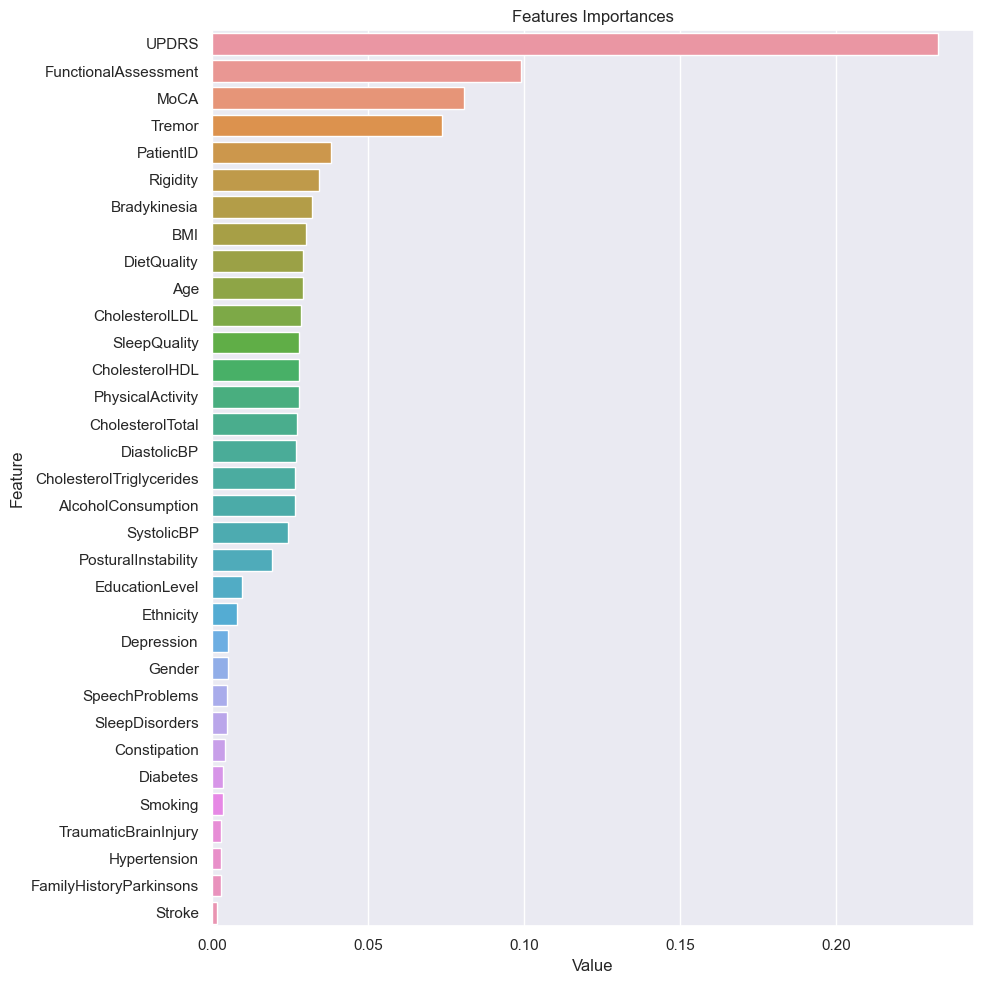

In [27]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features Importances')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_model, X)


In [28]:
models = [('LR', LogisticRegression()),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier(n_estimators=200)),
          ('SVC', SVC()),
          ('GBM', GradientBoostingClassifier(n_estimators=200, learning_rate=0.06)),
          ("XGBoost", XGBClassifier(learning_rate=0.06)),
          ("LightGBM", LGBMClassifier(learning_rate=0.06, verbose=-1)),
          ("CatBoost", CatBoostClassifier(learning_rate=0.06,verbose=False))]
# Train

In [29]:
# Train

acclist=[]
for name, model in models:
    acc = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy"))
    acclist.append([name,acc])
    print(f"Accuracy: {round(acc, 4)} ({name}) ")

Accuracy: 0.8099 (LR) 
Accuracy: 0.6926 (KNN) 
Accuracy: 0.8783 (CART) 
Accuracy: 0.9189 (RF) 
Accuracy: 0.8181 (SVC) 
Accuracy: 0.9322 (GBM) 
Accuracy: 0.9233 (XGBoost) 
Accuracy: 0.9265 (LightGBM) 
Accuracy: 0.9506 (CatBoost) 


In [30]:
# Predictions

acclist=[]
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc=round(accuracy_score(y_test,y_pred), 4)
    acclist.append([name,acc])
    print(f"Accuracy: {round(acc, 4)} ({name}) ")

Accuracy: 0.7894 (LR) 
Accuracy: 0.6774 (KNN) 
Accuracy: 0.8994 (CART) 
Accuracy: 0.9051 (RF) 
Accuracy: 0.7818 (SVC) 
Accuracy: 0.926 (GBM) 
Accuracy: 0.9146 (XGBoost) 
Accuracy: 0.9184 (LightGBM) 
Accuracy: 0.9507 (CatBoost) 


In [31]:
cat = CatBoostClassifier(learning_rate=0.06,verbose=False)
cat.fit(X_train, y_train)
y_pred_cat = cat.predict(X_test)

cat_accuracy=round(accuracy_score(y_test,y_pred), 4)*100
cat_accuracy
print(f"Accuracy: {round(cat_accuracy, 2)}% ({name}) ")

Accuracy: 95.07% (CatBoost) 


In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       195
           1       0.97      0.95      0.96       332

    accuracy                           0.95       527
   macro avg       0.94      0.95      0.95       527
weighted avg       0.95      0.95      0.95       527



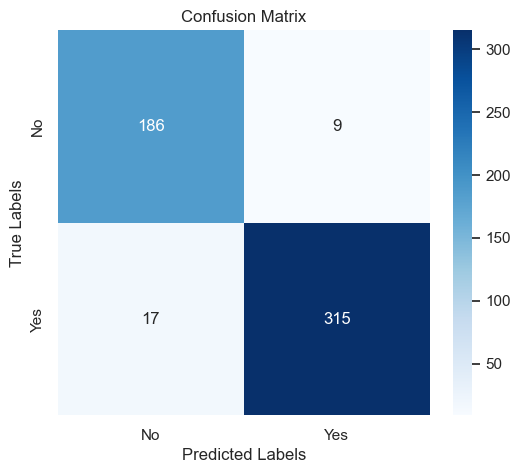

In [33]:
cm = confusion_matrix(y_test, y_pred)

class_labels = ['No', 'Yes']
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()